Análise Exploratória de Dados (AED) - PNAD COVID-19 Tech Challenge Fiap

Guillermo Jesus Camahuali Privat
Kelly Priscilla Matos Campos
Rosicleia Cavalcante Mota

Projeto: Análise do Comportamento da População durante a Pandemia de COVID-19 usando dados da PNAD-COVID do IBGE para Planejamento Hospitalar.

## Objetivos
Este notebook detalha a análise exploratória realizada sobre os dados consolidados da PNAD COVID-19 para os meses de Maio, Julho e Setembro de 2020. Os principais objetivos incluem:
1.  Entender o perfil demográfico e socioeconômico dos respondentes.
2.  Analisar a prevalência de sintomas de COVID-19 e os padrões de procura por atendimento médico.
3.  Avaliar o impacto econômico da pandemia na situação de trabalho e no recebimento de auxílios.
4.  Observar tendências e mudanças ao longo dos três meses pesquisados.
5.  Gerar insights que possam auxiliar no planejamento hospitalar para futuros surtos.
Nas próximas células, vamos importar as bibliotecas necessárias, configurar a conexão com o BigQuery e carregar nossa tabela analítica consolidada (`pnad_covid_analitica_consolidada`) para um DataFrame Pandas.

### Passo 1 e 2: Importar Bibliotecas e Configurar Cliente BigQuery
Importamos as bibliotecas essenciais para manipulação de dados (Pandas), visualização (Matplotlib, Seaborn) e para interagir com o Google BigQuery. Em seguida, configuramos o cliente BigQuery para o nosso projeto.

In [ ]:
from google.cloud import bigquery 
import pandas as pd              
import matplotlib.pyplot as plt   
import seaborn as sns             

%matplotlib inline

project_id = 'tech-chalenge-covid'
client = bigquery.Client(project=project_id)

print(f"Cliente BigQuery configurado para o projeto: {client.project}")
print("Bibliotecas importadas e cliente BigQuery pronto.")

### Passo 3 e 4: Buscar Dados Consolidados do BigQuery
Definimos a consulta SQL para selecionar todos os dados da nossa tabela analítica consolidada (`pnad_covid_analitica_consolidada`) e os carregamos em um DataFrame Pandas chamado `df_pnad`. Esta tabela já contém os dados dos três meses (Maio, Julho, Setembro de 2020), com variáveis decodificadas e tratamento inicial de nulos nas descrições.

In [27]:
sql_query = """
SELECT *
FROM `tech-chalenge-covid`.pnad_covid_processed.pnad_covid_analitica_consolidada
"""

print("Buscando dados do BigQuery (isso pode levar alguns momentos)...")
try:
    df_pnad = client.query(sql_query).to_dataframe() 
    print(f"Dados carregados com sucesso! O DataFrame tem {df_pnad.shape[0]} linhas e {df_pnad.shape[1]} colunas.")
except Exception as e:
    print(f"Ocorreu um erro ao buscar os dados: {e}")
    df_pnad = pd.DataFrame()

Buscando dados do BigQuery (isso pode levar alguns momentos)...


/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


Dados carregados com sucesso! O DataFrame tem 1120770 linhas e 38 colunas.


### Passo 5: Explorar Inicialmente o DataFrame Carregado
Após carregar os dados, realizamos uma exploração inicial para entender a estrutura do DataFrame:
- Visualizamos as primeiras e últimas linhas.
- Verificamos os tipos de dados de cada coluna e a contagem de valores não nulos com `df_pnad.info()`.
- Obtemos estatísticas descritivas para colunas numéricas e de objeto com `df_pnad.describe()`.
- Fazemos uma contagem de valores únicos para algumas colunas categóricas chave.
- Ajustamos os tipos de dados das colunas `DataReferencia_Mes` para datetime e `RendimentoHabitual_Valor` para numérico (float).

In [28]:
if not df_pnad.empty:
    print("\nPrimeiras 5 linhas do DataFrame (df_pnad.head()):")
    display(df_pnad.head()) 

    print("\nÚltimas 5 linhas do DataFrame (df_pnad.tail()):")
    display(df_pnad.tail())

    print("\nInformações sobre os tipos de dados e valores não nulos (df_pnad.info()):")
    df_pnad.info()

    print("\nEstatísticas descritivas para colunas numéricas (df_pnad.describe()):")
    display(df_pnad.describe(include='number')) 

    print("\nEstatísticas descritivas para colunas de objeto/string (df_pnad.describe(include='object')):")
    display(df_pnad.describe(include='object')) 

    print("\nContagem de valores únicos para algumas colunas categóricas de exemplo:")

    colunas_categoricas_exemplo = ['uf_desc', 'sexo_desc', 'escolaridade_desc', 'FaixaRendimento_desc', 'DataReferencia_Mes', 'Febre_desc', 'ProcurouAtendimento_desc']
    for coluna in colunas_categoricas_exemplo:
        if coluna in df_pnad.columns:
            print(f"\nContagem para a coluna: {coluna}")
            print(df_pnad[coluna].value_counts(dropna=False).head(15)) 
        else:
            print(f"Coluna {coluna} não encontrada no DataFrame.")
else:
    print("O DataFrame df_pnad está vazio. Verifique os passos anteriores para erros.")


Primeiras 5 linhas do DataFrame (df_pnad.head()):


,Ano,Mes_cod,Peso_Amostral,UF_cod,uf_desc,Idade,Sexo_cod,sexo_desc,CorRaca_cod,cor_raca_desc,...,AfastadoTrabalho_cod,AfastadoTrabalho_desc,PosicaoOcupacao_cod,PosicaoOcupacao_desc,FaixaRendimento_cod_str,FaixaRendimento_desc,RendimentoHabitual_Valor,AuxilioEmergencial_cod,AuxilioEmergencial_desc,DataReferencia_Mes
0,2020,9,185.763844,42,Santa Catarina,70,1,Homem,1,Branca,...,2,Não,<NA>,Não Informado,None,Não Informado,None,2,Não,2020-09-01
1,2020,9,612.900250,26,Pernambuco,65,1,Homem,2,Preta,...,2,Não,<NA>,Não Informado,None,Não Informado,None,1,Sim,2020-09-01
2,2020,9,625.398369,33,Rio de Janeiro,4,1,Homem,1,Branca,...,<NA>,Não Informado,<NA>,Não Informado,None,Não Informado,None,1,Sim,2020-09-01
3,2020,9,1523.749560,35,São Paulo,0,2,Mulher,1,Branca,...,<NA>,Não Informado,<NA>,Não Informado,None,Não Informado,None,2,Não,2020-09-01
4,2020,9,1386.528350,15,Pará,3,2,Mulher,4,Parda,...,<NA>,Não Informado,<NA>,Não Informado,None,Não Informado,None,1,Sim,2020-09-01



Últimas 5 linhas do DataFrame (df_pnad.tail()):


,Ano,Mes_cod,Peso_Amostral,UF_cod,uf_desc,Idade,Sexo_cod,sexo_desc,CorRaca_cod,cor_raca_desc,...,AfastadoTrabalho_cod,AfastadoTrabalho_desc,PosicaoOcupacao_cod,PosicaoOcupacao_desc,FaixaRendimento_cod_str,FaixaRendimento_desc,RendimentoHabitual_Valor,AuxilioEmergencial_cod,AuxilioEmergencial_desc,DataReferencia_Mes
1120765,2020,9,700.622060,33,Rio de Janeiro,50,2,Mulher,1,Branca,...,<NA>,Não Informado,4,Empregado do setor privado,06,3.001 - 10.000,3800.000000000,2,Não,2020-09-01
1120766,2020,9,220.076635,32,Espírito Santo,47,1,Homem,4,Parda,...,<NA>,Não Informado,5,Empregado do setor público (inclusive empresas...,06,3.001 - 10.000,10000.000000000,2,Não,2020-09-01
1120767,2020,9,716.821644,41,Paraná,29,2,Mulher,1,Branca,...,<NA>,Não Informado,5,Empregado do setor público (inclusive empresas...,06,3.001 - 10.000,4200.000000000,2,Não,2020-09-01
1120768,2020,9,262.502355,25,Paraíba,34,1,Homem,4,Parda,...,<NA>,Não Informado,7,Conta própria,06,3.001 - 10.000,4500.000000000,2,Não,2020-09-01
1120769,2020,9,371.376840,50,Mato Grosso do Sul,39,2,Mulher,1,Branca,...,<NA>,Não Informado,7,Conta própria,06,3.001 - 10.000,3500.000000000,2,Não,2020-09-01



Informações sobre os tipos de dados e valores não nulos (df_pnad.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120770 entries, 0 to 1120769
Data columns (total 38 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Ano                       1120770 non-null  Int64  
 1   Mes_cod                   1120770 non-null  Int64  
 2   Peso_Amostral             1120770 non-null  float64
 3   UF_cod                    1120770 non-null  Int64  
 4   uf_desc                   1120770 non-null  object 
 5   Idade                     1120770 non-null  Int64  
 6   Sexo_cod                  1120770 non-null  Int64  
 7   sexo_desc                 1120770 non-null  object 
 8   CorRaca_cod               1120770 non-null  Int64  
 9   cor_raca_desc             1120770 non-null  object 
 10  Escolaridade_cod          1120770 non-null  Int64  
 11  escolaridade_desc         1120770 non-null  object 
 12  Febre_cod

,Ano,Mes_cod,Peso_Amostral,UF_cod,Idade,Sexo_cod,CorRaca_cod,Escolaridade_cod,Febre_cod,Tosse_cod,DificuldadeRespirar_cod,PerdaOlfatoPaladar_cod,ProcurouAtendimento_cod,InternadoHospital_cod,PlanoSaude_cod,Trabalhou_cod,AfastadoTrabalho_cod,PosicaoOcupacao_cod,AuxilioEmergencial_cod
count,1120770.0,1120770.0,1.120770e+06,1120770.0,1120770.0,1120770.0,1120770.0,1120770.0,1120770.0,1120770.0,1120770.0,1120770.0,80461.0,6449.0,1120770.0,923607.0,543079.0,438658.0,1120770.0
mean,2020.0,7.067796,5.651412e+02,31.711103,36.751034,1.520073,2.577813,3.656362,2.00889,2.001244,2.016068,2.02547,1.804912,1.915026,1.789754,1.587998,1.869455,5.182144,1.500137
std,0.0,1.619978,5.051645e+02,10.789289,21.778367,0.499597,1.447164,1.98772,0.424471,0.434937,0.420675,0.500386,0.420969,0.346785,0.597421,0.492196,0.336902,1.782445,0.5
min,2020.0,5.0,8.727197e+00,11.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,2020.0,5.0,2.613624e+02,24.0,18.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,1.0
50%,2020.0,7.0,4.203876e+02,31.0,36.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0
75%,2020.0,9.0,6.944987e+02,41.0,53.0,2.0,4.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,2.0
max,2020.0,9.0,1.180334e+04,53.0,111.0,2.0,9.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,2.0,2.0,9.0,2.0



Estatísticas descritivas para colunas de objeto/string (df_pnad.describe(include='object')):


,uf_desc,sexo_desc,cor_raca_desc,escolaridade_desc,Febre_desc,Tosse_desc,DificuldadeRespirar_desc,PerdaOlfatoPaladar_desc,ProcurouAtendimento_desc,InternadoHospital_desc,PlanoSaude_desc,Trabalhou_desc,AfastadoTrabalho_desc,PosicaoOcupacao_desc,FaixaRendimento_cod_str,FaixaRendimento_desc,RendimentoHabitual_Valor,AuxilioEmergencial_desc
count,1120770,1120770,1120770,1120770,1120770,1120770,1120770,1120770,1120770,1120770,1120770,1120770,1120770,1120770,411956,1120770,411956,1120770
unique,27,2,6,8,4,4,4,4,4,5,3,3,3,10,10,11,2340,2
top,São Paulo,Mulher,Parda,Fundamental incompleto,Não,Não,Não,Não,Não Informado,Não Informado,Não,Não,Não Informado,Não Informado,04,Não Informado,1045.000000000,Não
freq,101944,582882,547608,376181,1098554,1089760,1105837,1102794,1040309,1114321,854573,543079,577691,682112,182865,708814,56555,560538



Contagem de valores únicos para algumas colunas categóricas de exemplo:

Contagem para a coluna: uf_desc
uf_desc
São Paulo            101944
Minas Gerais         101543
Rio de Janeiro        84143
Santa Catarina        68856
Rio Grande do Sul     65276
Paraná                59281
Maranhão              54504
Bahia                 51691
Ceará                 50431
Pernambuco            46904
Espírito Santo        44380
Goiás                 40301
Alagoas               34277
Pará                  33931
Mato Grosso           33689
Name: count, dtype: int64

Contagem para a coluna: sexo_desc
sexo_desc
Mulher    582882
Homem     537888
Name: count, dtype: int64

Contagem para a coluna: escolaridade_desc
escolaridade_desc
Fundamental incompleto                  376181
Médio completo                          251140
Sem instrução                           119973
Superior completo                       106354
Médio incompleto                        105186
Fundamental completa                   

## A. Perfil Demográfico e Socioeconômico da Amostra
Nesta seção, analisamos as características básicas dos respondentes da pesquisa para entender a composição da nossa amostra consolidada.

In [29]:
print("Tipo de dado de 'DataReferencia_Mes' ANTES da conversão:")
print(df_pnad['DataReferencia_Mes'].dtype)

df_pnad['DataReferencia_Mes'] = pd.to_datetime(df_pnad['DataReferencia_Mes'])

print("\nTipo de dado de 'DataReferencia_Mes' APÓS a conversão:")
print(df_pnad['DataReferencia_Mes'].dtype)
print("Primeiros valores de 'DataReferencia_Mes' após conversão:")
display(df_pnad['DataReferencia_Mes'].head())

Tipo de dado de 'DataReferencia_Mes' ANTES da conversão:
dbdate

Tipo de dado de 'DataReferencia_Mes' APÓS a conversão:
datetime64[ns]
Primeiros valores de 'DataReferencia_Mes' após conversão:


0   2020-09-01
1   2020-09-01
2   2020-09-01
3   2020-09-01
4   2020-09-01
Name: DataReferencia_Mes, dtype: datetime64[ns]

In [30]:
print("\nInformações do DataFrame COMPLETAS APÓS as conversões (df_pnad.info()):")
df_pnad.info()


Informações do DataFrame COMPLETAS APÓS as conversões (df_pnad.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120770 entries, 0 to 1120769
Data columns (total 38 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Ano                       1120770 non-null  Int64         
 1   Mes_cod                   1120770 non-null  Int64         
 2   Peso_Amostral             1120770 non-null  float64       
 3   UF_cod                    1120770 non-null  Int64         
 4   uf_desc                   1120770 non-null  object        
 5   Idade                     1120770 non-null  Int64         
 6   Sexo_cod                  1120770 non-null  Int64         
 7   sexo_desc                 1120770 non-null  object        
 8   CorRaca_cod               1120770 non-null  Int64         
 9   cor_raca_desc             1120770 non-null  object        
 10  Escolaridade_cod          1120770 non-nul

### A1. Distribuição por Unidade da Federação (UF)
Verificamos a distribuição dos respondentes entre as Unidades da Federação para entender a cobertura geográfica da amostra.


--- A1. Distribuição por Unidade da Federação (UF) ---

Contagem de Respondentes por UF:


uf_desc
São Paulo            101944
Minas Gerais         101543
Rio de Janeiro        84143
Santa Catarina        68856
Rio Grande do Sul     65276
Paraná                59281
Maranhão              54504
Bahia                 51691
Ceará                 50431
Pernambuco            46904
Name: count, dtype: int64


Percentual de Respondentes por UF:


uf_desc
São Paulo            9.095889
Minas Gerais         9.060110
Rio de Janeiro       7.507606
Santa Catarina       6.143633
Rio Grande do Sul    5.824210
Paraná               5.289310
Maranhão             4.863085
Bahia                4.612097
Ceará                4.499674
Pernambuco           4.184980
Name: proportion, dtype: float64

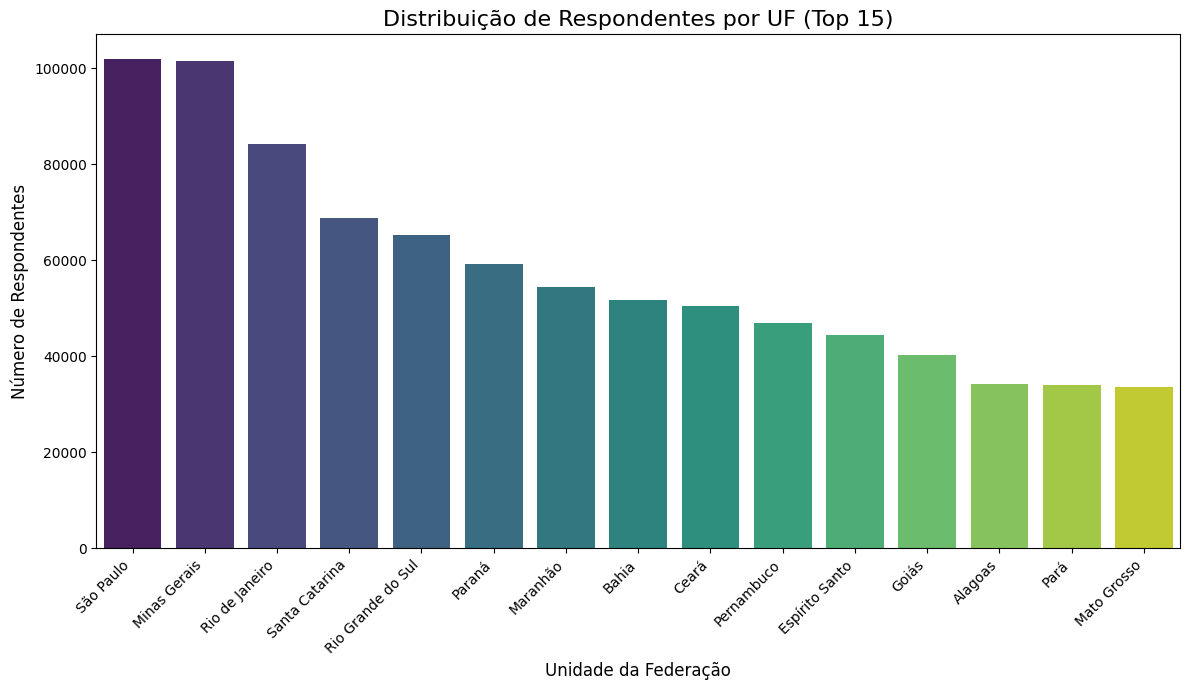

In [31]:
print("\n--- A1. Distribuição por Unidade da Federação (UF) ---")

contagem_uf = df_pnad['uf_desc'].value_counts(dropna=False)
percentual_uf = df_pnad['uf_desc'].value_counts(normalize=True, dropna=False) * 100

print("\nContagem de Respondentes por UF:")
display(contagem_uf.head(10))

print("\nPercentual de Respondentes por UF:")
display(percentual_uf.head(10))

plt.figure(figsize=(12, 7))
sns.barplot(x=contagem_uf.head(15).index, y=contagem_uf.head(15).values, palette="viridis")
plt.title('Distribuição de Respondentes por UF (Top 15)', fontsize=16)
plt.xlabel('Unidade da Federação', fontsize=12)
plt.ylabel('Número de Respondentes', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout() # Ajusta o layout para não cortar os rótulos
plt.show()


### A2. Distribuição de Idade
Analisamos a distribuição etária dos respondentes utilizando estatísticas descritivas, um histograma para visualizar a forma da distribuição e um boxplot para identificar quartis e possíveis outliers.


--- A2. Distribuição de Idade ---

Estatísticas Descritivas para Idade:


count    1120770.0
mean     36.751034
std      21.778367
min            0.0
25%           18.0
50%           36.0
75%           53.0
max          111.0
Name: Idade, dtype: Float64

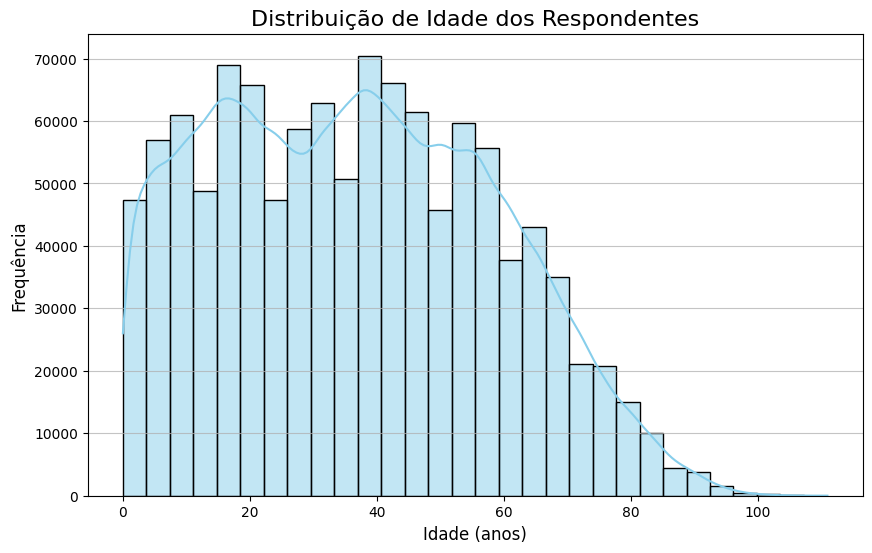

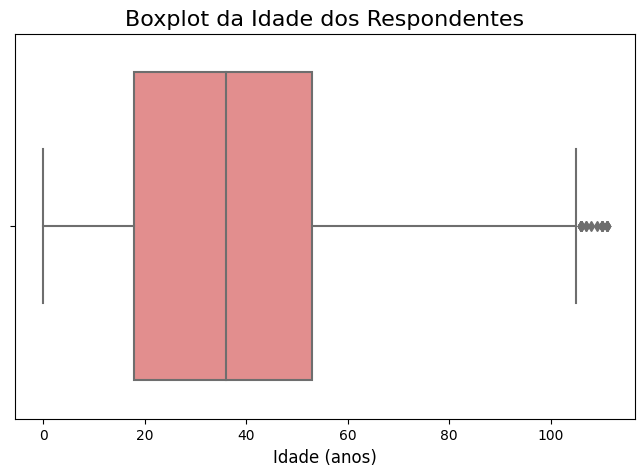

In [32]:
print("\n--- A2. Distribuição de Idade ---")

print("\nEstatísticas Descritivas para Idade:")
display(df_pnad['Idade'].describe())

plt.figure(figsize=(10, 6))
idade_para_plot = df_pnad['Idade'].dropna().astype(float) 
sns.histplot(idade_para_plot, bins=30, kde=True, color="skyblue")
plt.title('Distribuição de Idade dos Respondentes', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot da Idade para ver outliers e quartis
plt.figure(figsize=(8, 5))
# A conversão para float também é segura aqui, embora o boxplot seja menos sensível
sns.boxplot(x=df_pnad['Idade'].dropna().astype(float), color="lightcoral") # << PODE ADICIONAR .astype(float) AQUI TAMBÉM
plt.title('Boxplot da Idade dos Respondentes', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=12)
plt.show()


--- A3. Distribuição por Sexo ---

Contagem e Percentual por Sexo:


,Contagem,Percentual (%)
sexo_desc,,
Mulher,582882,52.007281
Homem,537888,47.992719


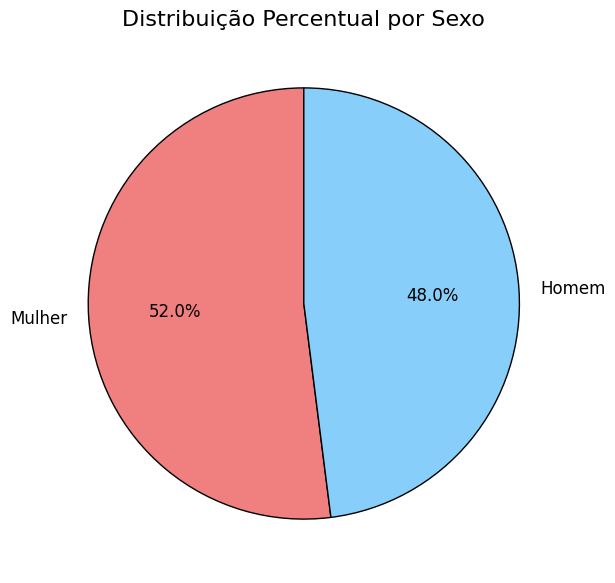

In [34]:
print("\n--- A3. Distribuição por Sexo ---")

contagem_sexo = df_pnad['sexo_desc'].value_counts(dropna=False)
percentual_sexo = df_pnad['sexo_desc'].value_counts(normalize=True, dropna=False) * 100

print("\nContagem e Percentual por Sexo:")
df_sexo_resumo = pd.DataFrame({'Contagem': contagem_sexo, 'Percentual (%)': percentual_sexo})
display(df_sexo_resumo)

# Gráfico de Pizza para Sexo
plt.figure(figsize=(7, 7))
plt.pie(percentual_sexo, labels=percentual_sexo.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'],
        wedgeprops={"edgecolor":"black"}, textprops={'fontsize': 12})
plt.title('Distribuição Percentual por Sexo', fontsize=16)
plt.show()


--- A4. Distribuição por Cor ou Raça ---

Contagem e Percentual por Cor/Raça:


,Contagem,Percentual (%)
cor_raca_desc,,
Parda,547608,48.859980
Branca,469721,41.910561
Preta,91837,8.194099
Amarela,6994,0.624035
Indígena,4291,0.382862
Ignorado,319,0.028463


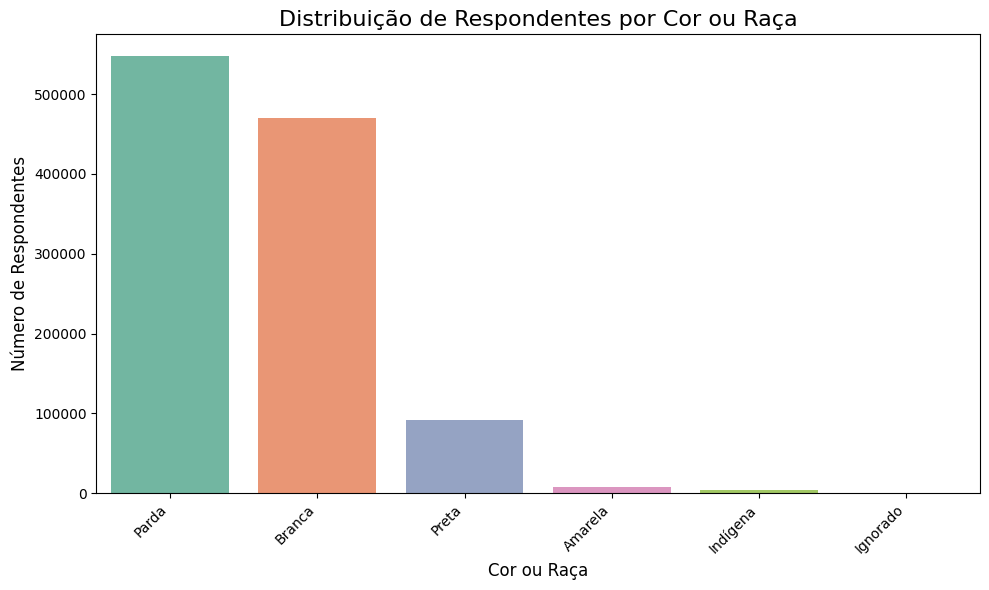

In [35]:
# A4. Distribuição por Cor ou Raça
print("\n--- A4. Distribuição por Cor ou Raça ---")

contagem_cor = df_pnad['cor_raca_desc'].value_counts(dropna=False)
percentual_cor = df_pnad['cor_raca_desc'].value_counts(normalize=True, dropna=False) * 100

print("\nContagem e Percentual por Cor/Raça:")
df_cor_resumo = pd.DataFrame({'Contagem': contagem_cor, 'Percentual (%)': percentual_cor})
display(df_cor_resumo)

# Gráfico de Barras para Cor/Raça
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_cor.index, y=contagem_cor.values, palette='Set2')
plt.title('Distribuição de Respondentes por Cor ou Raça', fontsize=16)
plt.xlabel('Cor ou Raça', fontsize=12)
plt.ylabel('Número de Respondentes', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


--- A5. Distribuição por Escolaridade ---

Contagem e Percentual por Escolaridade:


,Contagem,Percentual (%)
escolaridade_desc,,
Sem instrução,119973,10.704516
Fundamental incompleto,376181,33.564514
Fundamental completa,74772,6.671485
Médio incompleto,105186,9.385155
Médio completo,251140,22.407809
Superior incompleto,58472,5.217128
Superior completo,106354,9.489369
"Pós-graduação, mestrado ou doutorado",28692,2.560026


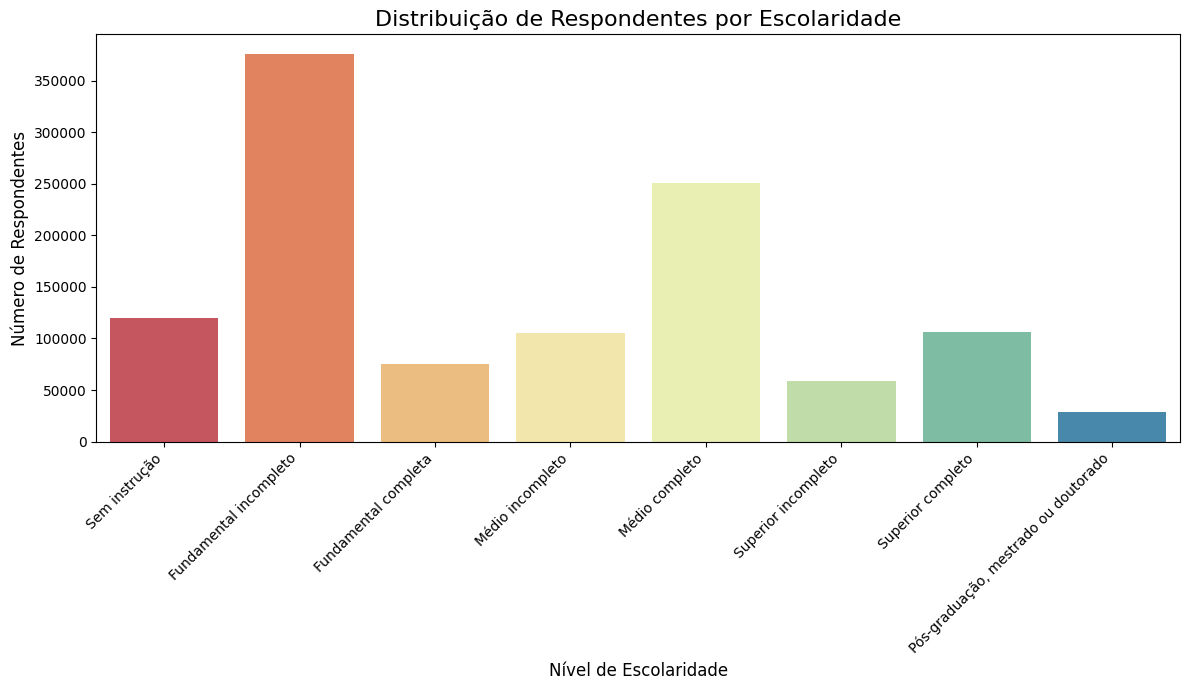

In [36]:
# A5. Distribuição por Escolaridade
print("\n--- A5. Distribuição por Escolaridade ---")

# A ordem das categorias de escolaridade é importante para o gráfico
ordem_escolaridade = [
    'Sem instrução',
    'Fundamental incompleto',
    'Fundamental completa',
    'Médio incompleto',
    'Médio completo',
    'Superior incompleto',
    'Superior completo',
    'Pós-graduação, mestrado ou doutorado',
    'Não Informado' # Se você usou COALESCE e esta categoria existe
]
ordem_presente_escolaridade = [cat for cat in ordem_escolaridade if cat in df_pnad['escolaridade_desc'].unique()]


contagem_escolaridade = df_pnad['escolaridade_desc'].value_counts(dropna=False).reindex(ordem_presente_escolaridade)
percentual_escolaridade = df_pnad['escolaridade_desc'].value_counts(normalize=True, dropna=False).reindex(ordem_presente_escolaridade) * 100


print("\nContagem e Percentual por Escolaridade:")
df_escolaridade_resumo = pd.DataFrame({'Contagem': contagem_escolaridade, 'Percentual (%)': percentual_escolaridade})
display(df_escolaridade_resumo.dropna()) # dropna() aqui para não mostrar categorias não encontradas no reindex se houver alguma discrepância

# Gráfico de Barras para Escolaridade
plt.figure(figsize=(12, 7))
sns.barplot(x=contagem_escolaridade.index, y=contagem_escolaridade.values, palette='Spectral')
plt.title('Distribuição de Respondentes por Escolaridade', fontsize=16)
plt.xlabel('Nível de Escolaridade', fontsize=12)
plt.ylabel('Número de Respondentes', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


--- A6. Distribuição por Faixa de Rendimento Habitual do Trabalho ---

Contagem e Percentual por Faixa de Rendimento:


,Contagem,Percentual (%)
FaixaRendimento_desc,,
0 - 100,3414,0.304612
101 - 300,14777,1.318469
301 - 600,30289,2.702517
601 - 800,16643,1.484961
801 - 1.600,182865,16.316015
1.601 - 3.000,100032,8.925292
3.001 - 10.000,56085,5.004149
10.001 - 50.000,7779,0.694076
50.001 - 100.000,63,0.005621


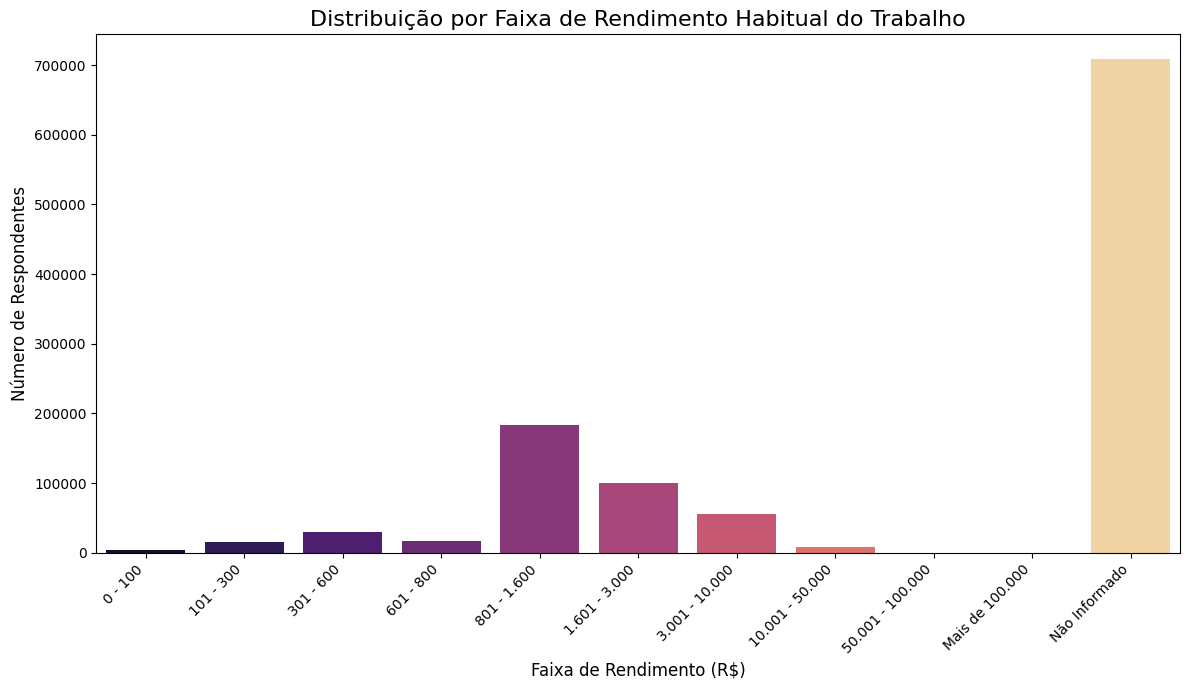

In [37]:
# A6. Distribuição por Faixa de Rendimento Habitual do Trabalho
print("\n--- A6. Distribuição por Faixa de Rendimento Habitual do Trabalho ---")

# Lembre-se que 'Não Informado' aqui inclui pessoas para quem a pergunta não se aplica (ex: não trabalham)
# e também aqueles que não informaram o rendimento.

# Definir uma ordem lógica para as faixas de rendimento para o gráfico
ordem_faixa_rendimento = [
    '0 - 100',
    '101 - 300',
    '301 - 600',
    '601 - 800',
    '801 - 1.600',
    '1.601 - 3.000',
    '3.001 - 10.000',
    '10.001 - 50.000',
    '50.001 - 100.000',
    'Mais de 100.000',
    'Não Informado' # A categoria que criamos com COALESCE
]
# Filtrar para apenas as categorias presentes nos dados
ordem_presente_faixa_rendimento = [cat for cat in ordem_faixa_rendimento if cat in df_pnad['FaixaRendimento_desc'].unique()]

contagem_faixa_rend = df_pnad['FaixaRendimento_desc'].value_counts(dropna=False).reindex(ordem_presente_faixa_rendimento)
percentual_faixa_rend = df_pnad['FaixaRendimento_desc'].value_counts(normalize=True, dropna=False).reindex(ordem_presente_faixa_rendimento) * 100

print("\nContagem e Percentual por Faixa de Rendimento:")
df_faixa_rend_resumo = pd.DataFrame({'Contagem': contagem_faixa_rend, 'Percentual (%)': percentual_faixa_rend})
display(df_faixa_rend_resumo.dropna()) # dropna() para não mostrar categorias não encontradas no reindex

# Gráfico de Barras para Faixa de Rendimento
plt.figure(figsize=(12, 7))
sns.barplot(x=contagem_faixa_rend.index, y=contagem_faixa_rend.values, palette='magma')
plt.title('Distribuição por Faixa de Rendimento Habitual do Trabalho', fontsize=16)
plt.xlabel('Faixa de Rendimento (R$)', fontsize=12)
plt.ylabel('Número de Respondentes', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


--- A7. Distribuição do Valor do Rendimento Habitual do Trabalho ---

Estatísticas Descritivas para o Valor do Rendimento Habitual (apenas respondentes com valor):


count    411956.000000
mean       2225.431046
std        3027.643112
min           2.000000
25%        1045.000000
50%        1400.000000
75%        2431.000000
max      250000.000000
Name: RendimentoHabitual_Valor, dtype: float64

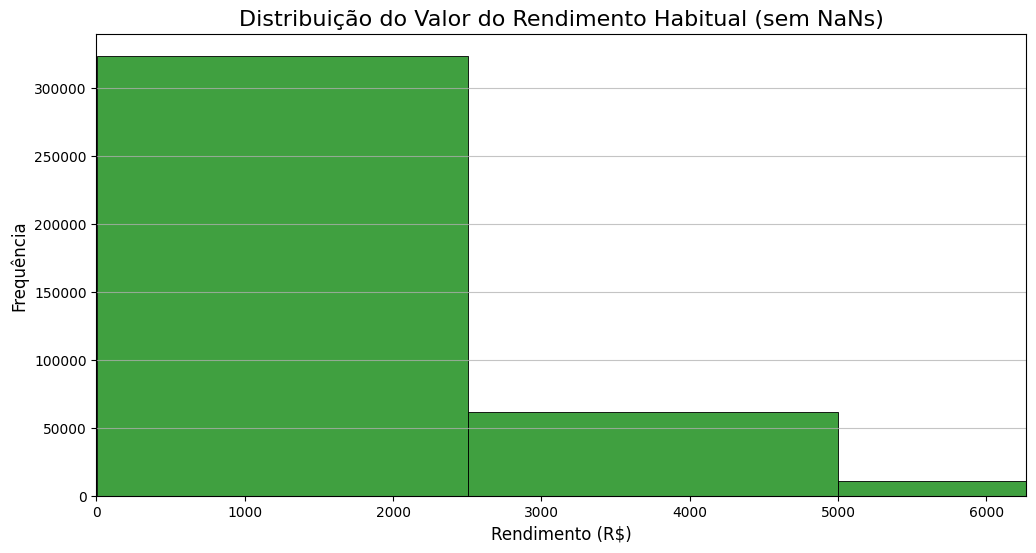

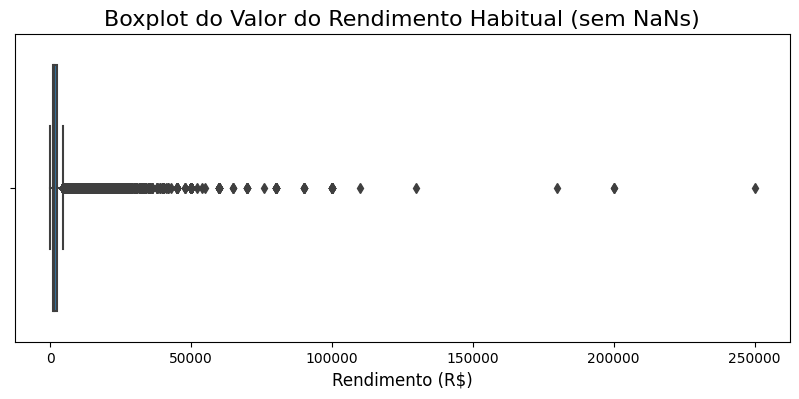


Percentil 99 do Rendimento: R$ 15000.00
Número de pessoas com rendimento > R$ 20000: 1219


In [61]:
print("\n--- A7. Distribuição do Valor do Rendimento Habitual do Trabalho ---")

df_pnad['RendimentoHabitual_Valor'] = pd.to_numeric(df_pnad['RendimentoHabitual_Valor'], errors='coerce') 

rendimento_valores = df_pnad['RendimentoHabitual_Valor'].dropna()

print("\nEstatísticas Descritivas para o Valor do Rendimento Habitual (apenas respondentes com valor):")
if not rendimento_valores.empty:
    display(rendimento_valores.describe())

    # Histograma do Rendimento
    plt.figure(figsize=(12, 6))
    sns.histplot(rendimento_valores, bins=100, color="green", kde=False)
    plt.title('Distribuição do Valor do Rendimento Habitual (sem NaNs)', fontsize=16)
    plt.xlabel('Rendimento (R$)', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
l
    if len(rendimento_valores) > 0: 
        plt.xlim(0, rendimento_valores.quantile(0.95))
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=rendimento_valores)
    plt.title('Boxplot do Valor do Rendimento Habitual (sem NaNs)', fontsize=16)
    plt.xlabel('Rendimento (R$)', fontsize=12)
    plt.show()

    if len(rendimento_valores) > 0: # Adicionado para evitar erro em .quantile() se estiver vazio
        print(f"\nPercentil 99 do Rendimento: R$ {rendimento_valores.quantile(0.99):.2f}")
        print(f"Número de pessoas com rendimento > R$ 20000: {len(rendimento_valores[rendimento_valores > 20000])}")
else:
    print("Não há valores de rendimento válidos para exibir estatísticas ou gráficos após a conversão e remoção de NaNs.")

### A8.1. Distribuição por Posição na Ocupação (Excluindo "Não Informado")
Para uma melhor visualização da distribuição entre as categorias de trabalho efetivas, geramos um segundo gráfico excluindo a categoria "Não Informado", que é muito numerosa e inclui indivíduos não aplicáveis à pergunta.


--- A8.1. Distribuição por Posição na Ocupação (Excluindo 'Não Informado') ---


/var/tmp/ipykernel_3245/1455063943.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


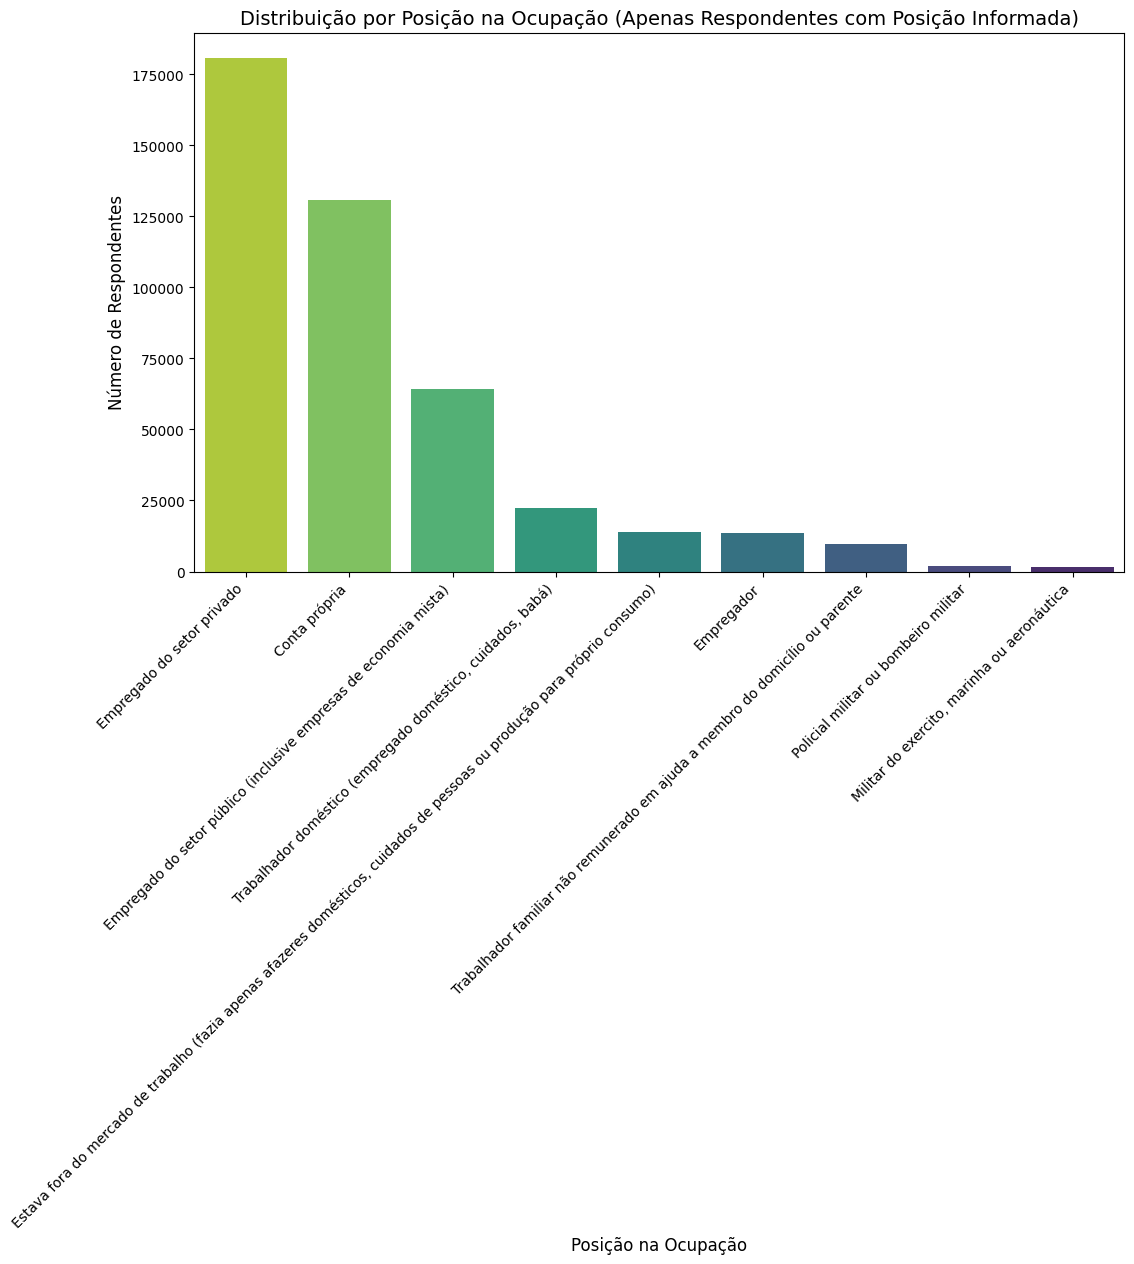

In [41]:
print("\n--- A8.1. Distribuição por Posição na Ocupação (Excluindo 'Não Informado') ---")

if 'PosicaoOcupacao_desc' in df_pnad.columns:
    df_pos_ocup_filtrado = df_pnad[df_pnad['PosicaoOcupacao_desc'] != 'Não Informado'].copy() 

    if not df_pos_ocup_filtrado.empty:
        # Recalcular contagens sobre os dados filtrados
        contagem_pos_ocup_filt = df_pos_ocup_filtrado['PosicaoOcupacao_desc'].value_counts(dropna=False)

        if not contagem_pos_ocup_filt.empty:
            plt.figure(figsize=(12, 7))
            sns.barplot(x=contagem_pos_ocup_filt.index, y=contagem_pos_ocup_filt.values, palette='viridis_r')
            plt.title('Distribuição por Posição na Ocupação (Apenas Respondentes com Posição Informada)', fontsize=14)
            plt.xlabel('Posição na Ocupação', fontsize=12)
            plt.ylabel('Número de Respondentes', fontsize=12)
            plt.xticks(rotation=45, ha="right", fontsize=10)
            plt.tight_layout()
            plt.show()
        else:
            print("Não há categorias para exibir no gráfico após filtrar 'Não Informado' e fazer value_counts.")
    else:
        print("O DataFrame ficou vazio após filtrar 'Não Informado'. Nenhuma posição na ocupação para exibir.")
else:
    print("Coluna 'PosicaoOcupacao_desc' não encontrada no DataFrame.")

## B. Análise Clínica dos Sintomas e Procura por Atendimento
Nesta seção, investigamos a prevalência dos principais sintomas de COVID-19 reportados, a frequência com que os indivíduos sintomáticos procuraram atendimento médico, as taxas de internação e a possível influência do plano de saúde nesses comportamentos.


--- B1. Prevalência dos Principais Sintomas Reportados ---

Analisando Sintoma: Febre (Coluna: Febre_desc)
Contagem e Percentual:


,Contagem,Percentual (%)
Febre_desc,,
Não,1098554,98.017791
Sim,17364,1.549292
Ignorado,3746,0.334234
Não sabe,1106,0.098682



Analisando Sintoma: Tosse (Coluna: Tosse_desc)
Contagem e Percentual:


,Contagem,Percentual (%)
Tosse_desc,,
Não,1089760,97.233152
Sim,26121,2.330630
Ignorado,3771,0.336465
Não sabe,1118,0.099753



Analisando Sintoma: Dificuldade para Respirar (Coluna: DificuldadeRespirar_desc)
Contagem e Percentual:


,Contagem,Percentual (%)
DificuldadeRespirar_desc,,
Não,1105837,98.667612
Sim,9943,0.887158
Ignorado,3827,0.341462
Não sabe,1163,0.103768



Analisando Sintoma: Perda de Olfato/Paladar (Coluna: PerdaOlfatoPaladar_desc)
Contagem e Percentual:


,Contagem,Percentual (%)
PerdaOlfatoPaladar_desc,,
Não,1102794,98.396103
Sim,11176,0.997172
Ignorado,5487,0.489574
Não sabe,1313,0.117152


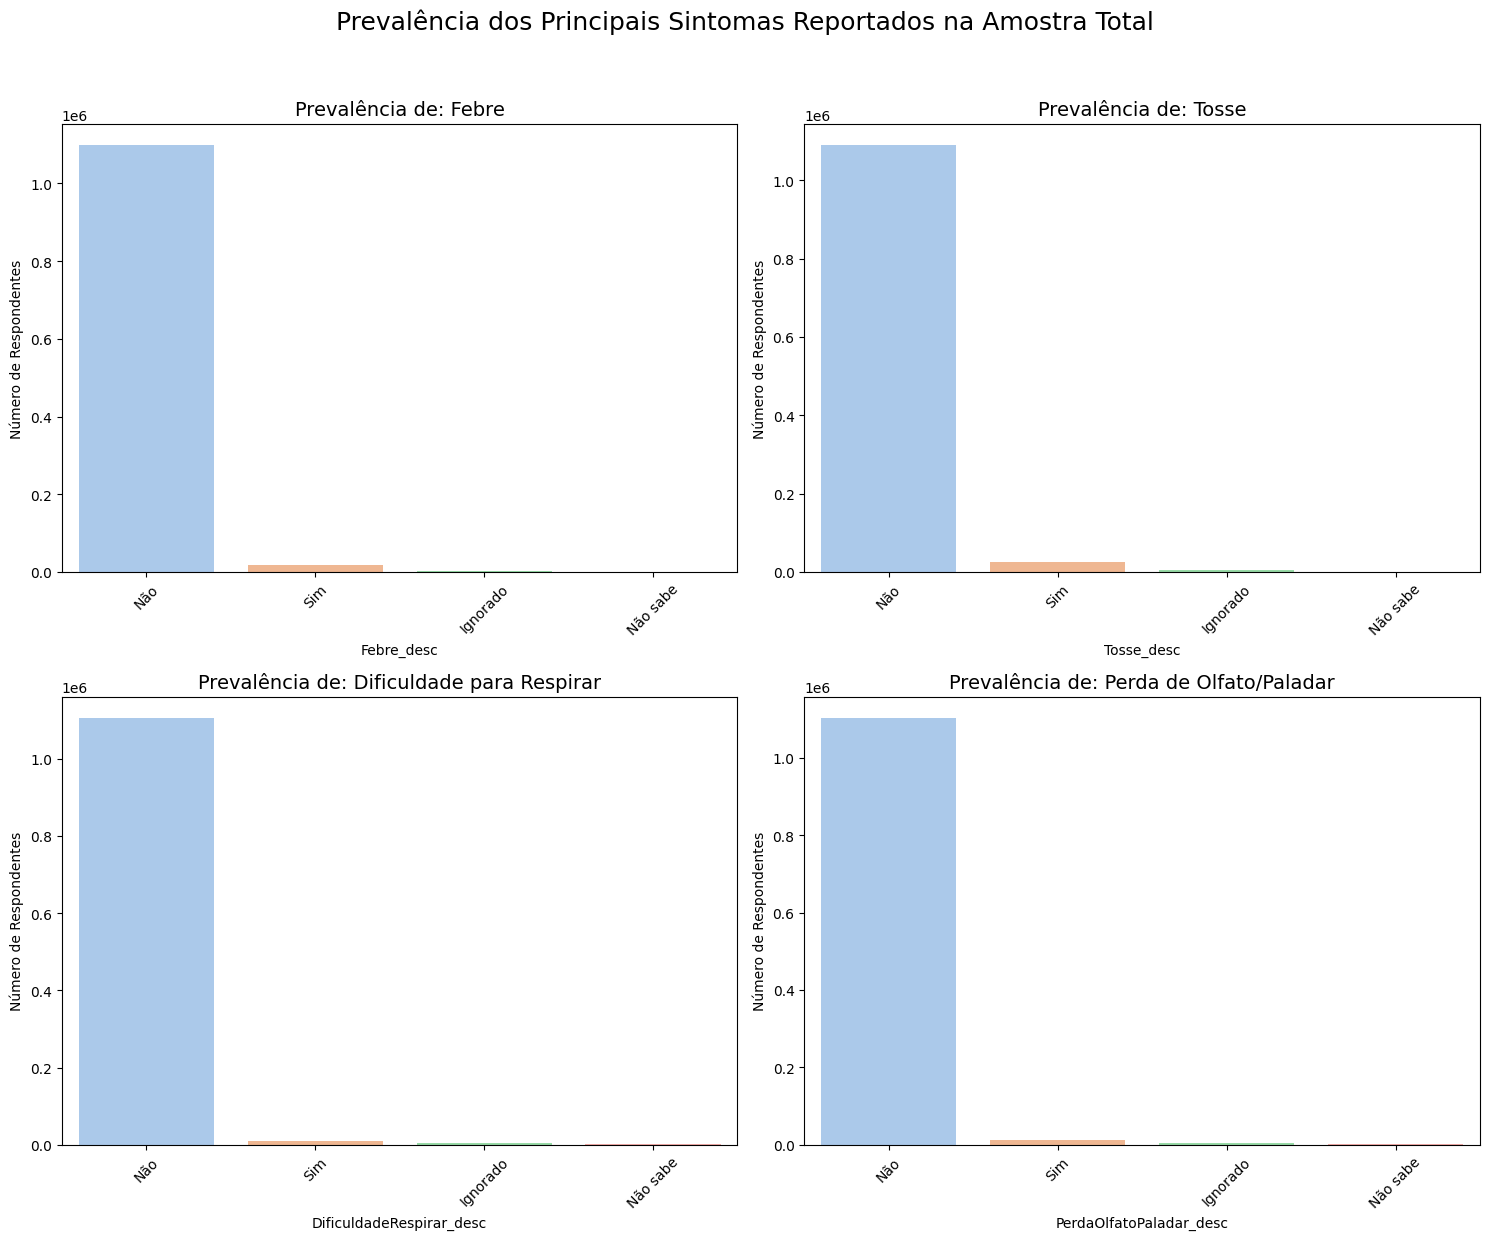

In [42]:
print("\n--- B1. Prevalência dos Principais Sintomas Reportados ---")

sintomas_principais = {
    'Febre': 'Febre_desc',
    'Tosse': 'Tosse_desc',
    'Dificuldade para Respirar': 'DificuldadeRespirar_desc',
    'Perda de Olfato/Paladar': 'PerdaOlfatoPaladar_desc'
}

fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # 2 linhas, 2 colunas de gráficos
axes = axes.flatten() # Para facilitar a iteração sobre os eixos

for i, (nome_sintoma, coluna_sintoma) in enumerate(sintomas_principais.items()):
    if coluna_sintoma in df_pnad.columns:
        print(f"\nAnalisando Sintoma: {nome_sintoma} (Coluna: {coluna_sintoma})")
        contagem = df_pnad[coluna_sintoma].value_counts(dropna=False)
        percentual = df_pnad[coluna_sintoma].value_counts(normalize=True, dropna=False) * 100

        print("Contagem e Percentual:")
        resumo_sintoma = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})
        display(resumo_sintoma)

        # Gráfico de Barras para o sintoma
        sns.barplot(x=contagem.index, y=contagem.values, ax=axes[i], palette="pastel")
        axes[i].set_title(f'Prevalência de: {nome_sintoma}', fontsize=14)
        axes[i].set_ylabel('Número de Respondentes', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)
    else:
        print(f"Coluna {coluna_sintoma} para {nome_sintoma} não encontrada no DataFrame.")

plt.suptitle('Prevalência dos Principais Sintomas Reportados na Amostra Total', fontsize=18, y=1.03)
plt.tight_layout()
plt.show()


--- B2. Procura por Atendimento Médico entre Pessoas com ALGUM Sintoma Principal ---
Número de respondentes que reportaram pelo menos um sintoma principal: 40610

Procura por Atendimento (Entre os que tiveram algum sintoma principal):


,Contagem,Percentual (%)
ProcurouAtendimento_desc,,
Não,28649,70.546663
Sim,11944,29.411475
Ignorado,17,0.041862


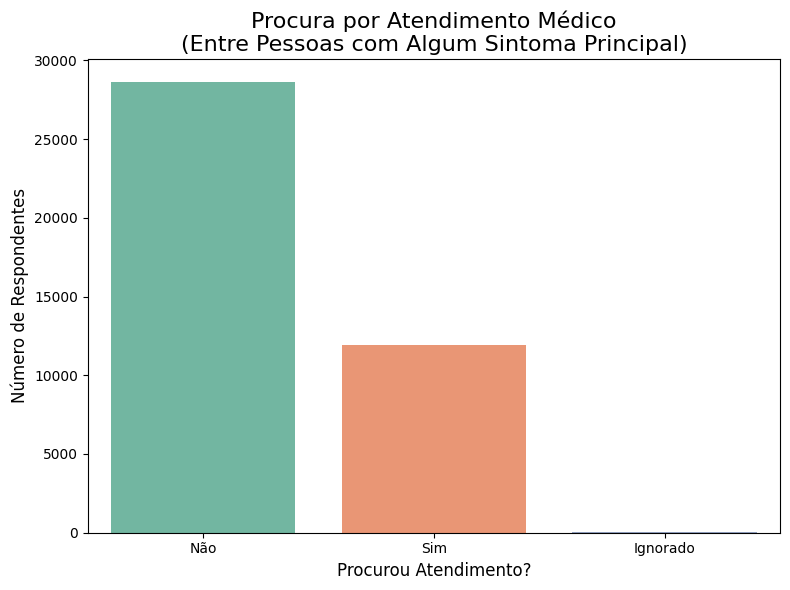

In [43]:
print("\n--- B2. Procura por Atendimento Médico entre Pessoas com ALGUM Sintoma Principal ---")

df_pnad['Teve_Algum_Sintoma_Principal'] = (
    (df_pnad['Febre_desc'] == 'Sim') |
    (df_pnad['Tosse_desc'] == 'Sim') |
    (df_pnad['DificuldadeRespirar_desc'] == 'Sim') |
    (df_pnad['PerdaOlfatoPaladar_desc'] == 'Sim')
)

df_com_sintomas = df_pnad[df_pnad['Teve_Algum_Sintoma_Principal'] == True].copy() 

if not df_com_sintomas.empty:
    print(f"Número de respondentes que reportaram pelo menos um sintoma principal: {len(df_com_sintomas)}")

    contagem_procura_atend = df_com_sintomas['ProcurouAtendimento_desc'].value_counts(dropna=False)
    percentual_procura_atend = df_com_sintomas['ProcurouAtendimento_desc'].value_counts(normalize=True, dropna=False) * 100

    print("\nProcura por Atendimento (Entre os que tiveram algum sintoma principal):")
    df_procura_resumo = pd.DataFrame({'Contagem': contagem_procura_atend, 'Percentual (%)': percentual_procura_atend})
    display(df_procura_resumo)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=contagem_procura_atend.index, y=contagem_procura_atend.values, palette="Set2")
    plt.title('Procura por Atendimento Médico\n(Entre Pessoas com Algum Sintoma Principal)', fontsize=16)
    plt.ylabel('Número de Respondentes', fontsize=12)
    plt.xlabel('Procurou Atendimento?', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum respondente encontrado com algum dos sintomas principais.")



--- B3. Taxa de Internação entre os que Procuraram Atendimento e Tinham Sintomas ---
Número de respondentes com sintomas que procuraram atendimento: 11944

Resultado da Internação (Entre os com sintomas que procuraram atendimento):


,Contagem,Percentual (%)
InternadoHospital_desc,,
Não Informado,6884,57.635633
"Não, não ficou internado",4379,36.662760
"Sim, ficou internado",586,4.906229
Não foi atendido,94,0.787006
Ignorado,1,0.008372


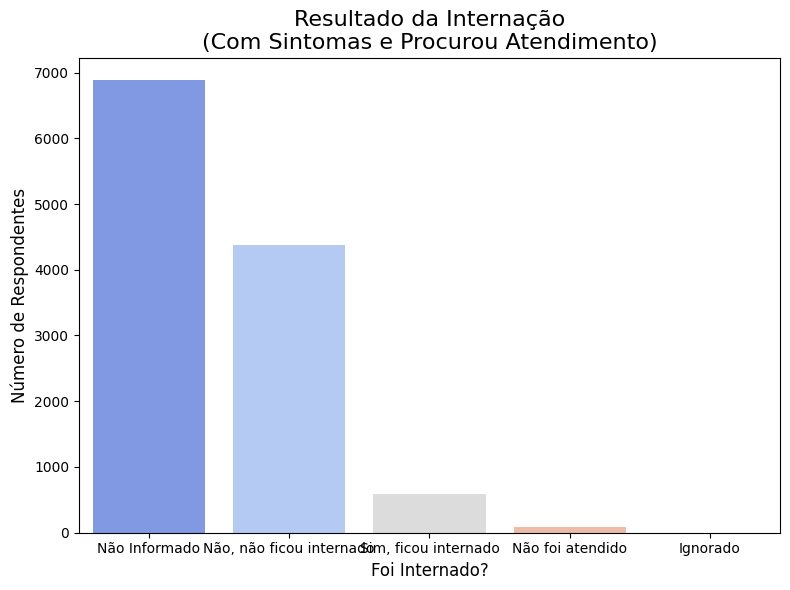

In [44]:
print("\n--- B3. Taxa de Internação entre os que Procuraram Atendimento e Tinham Sintomas ---")

df_sintomas_e_procurou_atend = df_com_sintomas[df_com_sintomas['ProcurouAtendimento_desc'] == 'Sim'].copy()

if not df_sintomas_e_procurou_atend.empty:
    print(f"Número de respondentes com sintomas que procuraram atendimento: {len(df_sintomas_e_procurou_atend)}")

    contagem_internado = df_sintomas_e_procurou_atend['InternadoHospital_desc'].value_counts(dropna=False)
    percentual_internado = df_sintomas_e_procurou_atend['InternadoHospital_desc'].value_counts(normalize=True, dropna=False) * 100

    print("\nResultado da Internação (Entre os com sintomas que procuraram atendimento):")
    df_internado_resumo = pd.DataFrame({'Contagem': contagem_internado, 'Percentual (%)': percentual_internado})
    display(df_internado_resumo)

    # Gráfico de Barras
    plt.figure(figsize=(8, 6))
    sns.barplot(x=contagem_internado.index, y=contagem_internado.values, palette="coolwarm")
    plt.title('Resultado da Internação\n(Com Sintomas e Procurou Atendimento)', fontsize=16)
    plt.ylabel('Número de Respondentes', fontsize=12)
    plt.xlabel('Foi Internado?', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum respondente encontrado com sintomas que também procurou atendimento.")


--- B4. Relação entre Ter Plano de Saúde e Procurar Atendimento (entre sintomáticos) ---

Percentual de Procura por Atendimento por Status do Plano de Saúde (Entre Sintomáticos):


ProcurouAtendimento_desc,Ignorado,Não,Sim
PlanoSaude_desc,,,
Ignorado,31.11%,51.11%,17.78%
Não,0.01%,71.86%,28.14%
Sim,0.01%,65.93%,34.06%


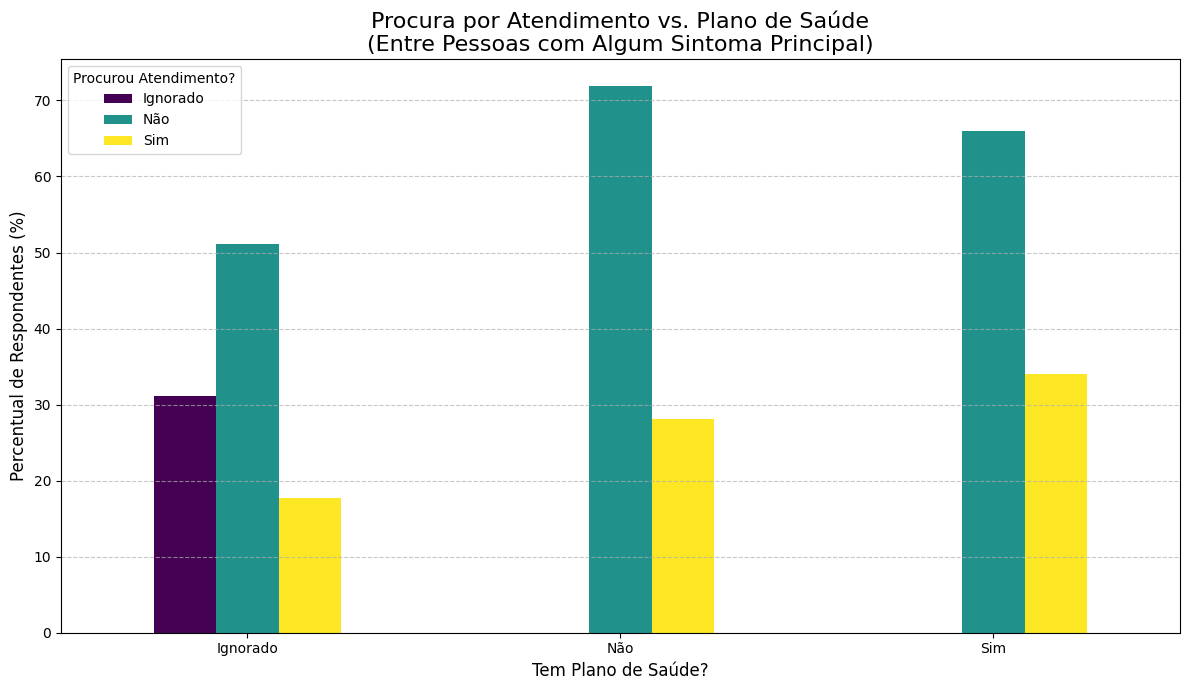

In [45]:
print("\n--- B4. Relação entre Ter Plano de Saúde e Procurar Atendimento (entre sintomáticos) ---")

if not df_com_sintomas.empty:
    # Tabela Cruzada (Crosstab)
    tabela_cruzada_plano_atend = pd.crosstab(df_com_sintomas['PlanoSaude_desc'], 
                                             df_com_sintomas['ProcurouAtendimento_desc'],
                                             normalize='index') * 100 

    print("\nPercentual de Procura por Atendimento por Status do Plano de Saúde (Entre Sintomáticos):")
    display(tabela_cruzada_plano_atend.style.format("{:.2f}%"))

    # Gráfico de Barras Agrupadas
    tabela_cruzada_plano_atend.plot(kind='bar', figsize=(12, 7), colormap="viridis")
    plt.title('Procura por Atendimento vs. Plano de Saúde\n(Entre Pessoas com Algum Sintoma Principal)', fontsize=16)
    plt.ylabel('Percentual de Respondentes (%)', fontsize=12)
    plt.xlabel('Tem Plano de Saúde?', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Procurou Atendimento?')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Não há dados de sintomáticos para analisar a relação com plano de saúde.")

## C. Análise do Impacto Econômico e Auxílios
A pandemia teve um impacto significativo na economia. Nesta seção, analisamos a situação de trabalho dos respondentes, os afastamentos, a posição na ocupação, a distribuição de rendimento e o recebimento de auxílio emergencial.


--- C1. Situação de Trabalho (Trabalhou na Semana de Referência) ---

Contagem e Percentual - Trabalhou na Semana de Referência:


,Contagem,Percentual (%)
Trabalhou_desc,,
Não,543079,48.455883
Sim,380528,33.952372
Não Informado,197163,17.591745


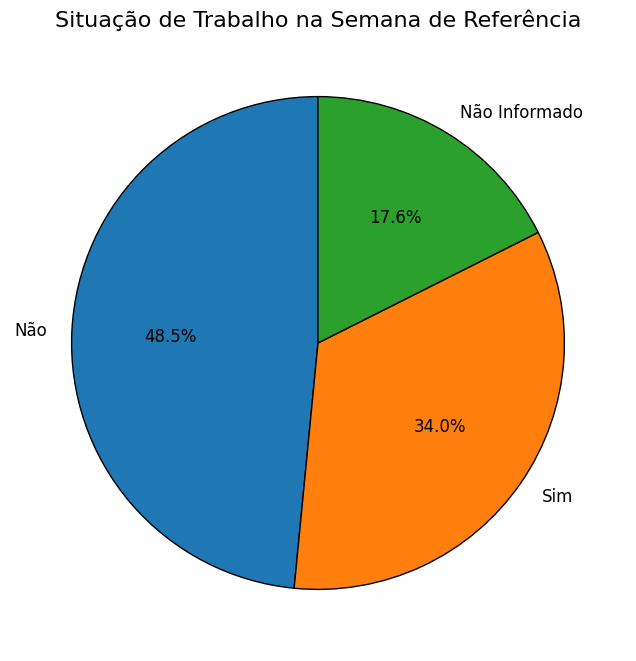

In [46]:
print("\n--- C1. Situação de Trabalho (Trabalhou na Semana de Referência) ---")

contagem_trabalhou = df_pnad['Trabalhou_desc'].value_counts(dropna=False)
percentual_trabalhou = df_pnad['Trabalhou_desc'].value_counts(normalize=True, dropna=False) * 100

print("\nContagem e Percentual - Trabalhou na Semana de Referência:")
df_trabalhou_resumo = pd.DataFrame({'Contagem': contagem_trabalhou, 'Percentual (%)': percentual_trabalhou})
display(df_trabalhou_resumo)

plt.figure(figsize=(8, 8))
categorias_plot = contagem_trabalhou[contagem_trabalhou > 0] # Apenas categorias com contagem > 0

if not categorias_plot.empty:
    plt.pie(categorias_plot, labels=categorias_plot.index, autopct='%1.1f%%', startangle=90,
            wedgeprops={"edgecolor":"black"}, textprops={'fontsize': 12})
    plt.title('Situação de Trabalho na Semana de Referência', fontsize=16)
    plt.show()
else:
    print("Não há dados para a coluna Trabalhou_desc.")


--- C2. Afastamento do Trabalho (Estava Temporariamente Afastado) ---

Contagem e Percentual - Estava Afastado do Trabalho (Apenas respostas 'Sim' ou 'Não'):


,Contagem,Percentual (%)
AfastadoTrabalho_desc,,
Não,472183,86.945546
Sim,70896,13.054454


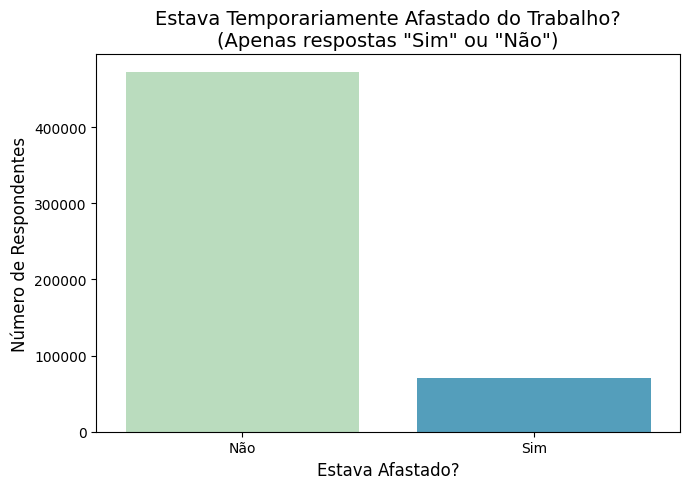


Contagem total para AfastadoTrabalho_desc (incluindo 'Não Informado') para referência:


AfastadoTrabalho_desc
Não Informado    577691
Não              472183
Sim               70896
Name: count, dtype: int64

In [47]:
print("\n--- C2. Afastamento do Trabalho (Estava Temporariamente Afastado) ---")

# Focando a visualização nas respostas 'Sim' e 'Não'
df_afastado_relevante = df_pnad[df_pnad['AfastadoTrabalho_desc'].isin(['Sim', 'Não'])].copy()

if not df_afastado_relevante.empty:
    contagem_afastado = df_afastado_relevante['AfastadoTrabalho_desc'].value_counts(dropna=False)
    percentual_afastado = df_afastado_relevante['AfastadoTrabalho_desc'].value_counts(normalize=True, dropna=False) * 100

    print("\nContagem e Percentual - Estava Afastado do Trabalho (Apenas respostas 'Sim' ou 'Não'):")
    df_afastado_resumo = pd.DataFrame({'Contagem': contagem_afastado, 'Percentual (%)': percentual_afastado})
    display(df_afastado_resumo)

    # Gráfico de Barras
    plt.figure(figsize=(7, 5))
    sns.barplot(x=contagem_afastado.index, y=contagem_afastado.values, palette="GnBu")
    plt.title('Estava Temporariamente Afastado do Trabalho?\n(Apenas respostas "Sim" ou "Não")', fontsize=14) 
    plt.ylabel('Número de Respondentes', fontsize=12)
    plt.xlabel('Estava Afastado?', fontsize=12)
    # plt.xticks(rotation=0) # Rotação 0 é o padrão para poucos itens, pode ser omitido
    plt.tight_layout()
    plt.show()
else:
    print("Não há respondentes com resposta 'Sim' ou 'Não' para Afastamento do Trabalho.")

# Para referência, a contagem total incluindo "Não Informado"
print("\nContagem total para AfastadoTrabalho_desc (incluindo 'Não Informado') para referência:")
display(df_pnad['AfastadoTrabalho_desc'].value_counts(dropna=False).head())


--- C2.1 Análise Específica: Afastamento para Pessoas em Idade Ativa que NÃO Trabalharam ---

Analisando afastamento para 543079 pessoas em idade ativa que não trabalharam na semana:


,Contagem,Percentual (%)
AfastadoTrabalho_desc,,
Não,472183,86.945546
Sim,70896,13.054454


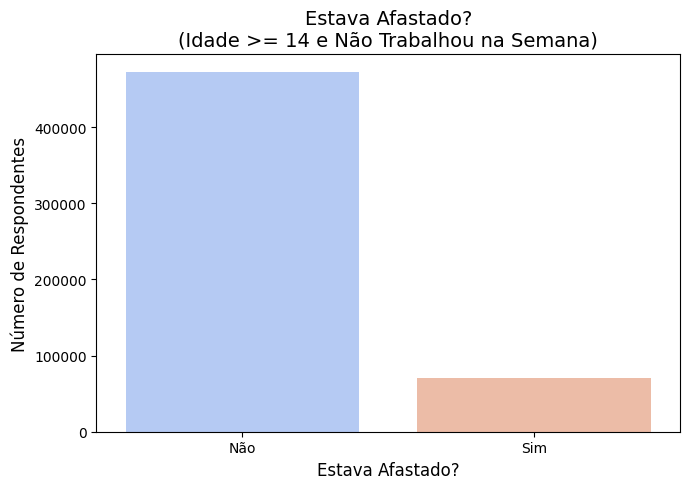

In [48]:
print("\n--- C2.1 Análise Específica: Afastamento para Pessoas em Idade Ativa que NÃO Trabalharam ---")

df_idade_ativa_nao_trabalhou = df_pnad[(df_pnad['Idade'] >= 14) & (df_pnad['Trabalhou_desc'] == 'Não')].copy()

if not df_idade_ativa_nao_trabalhou.empty:
    print(f"\nAnalisando afastamento para {len(df_idade_ativa_nao_trabalhou)} pessoas em idade ativa que não trabalharam na semana:")
    
    contagem_afast_filtrado = df_idade_ativa_nao_trabalhou['AfastadoTrabalho_desc'].value_counts(dropna=False)
    percentual_afast_filtrado = df_idade_ativa_nao_trabalhou['AfastadoTrabalho_desc'].value_counts(normalize=True, dropna=False) * 100
    
    df_afast_filtrado_resumo = pd.DataFrame({'Contagem': contagem_afast_filtrado, 'Percentual (%)': percentual_afast_filtrado})
    display(df_afast_filtrado_resumo)

    # Gráfico para este subconjunto, focando em 'Sim' e 'Não'
    categorias_plot_afast_filt = contagem_afast_filtrado[contagem_afast_filtrado.index.isin(['Sim', 'Não'])]
    if not categorias_plot_afast_filt.empty:
        plt.figure(figsize=(7, 5))
        sns.barplot(x=categorias_plot_afast_filt.index, y=categorias_plot_afast_filt.values, palette="coolwarm")
        plt.title('Estava Afastado?\n(Idade >= 14 e Não Trabalhou na Semana)', fontsize=14)
        plt.ylabel('Número de Respondentes', fontsize=12)
        plt.xlabel('Estava Afastado?', fontsize=12)
        plt.tight_layout()
        plt.show()
    else:
        print("Não há dados suficientes de 'Sim' ou 'Não' para afastamento neste subconjunto.")
else:
    print("Nenhum respondente encontrado no critério de idade ativa e não trabalhou na semana.")


--- C3. Posição na Ocupação (Foco nos que Informaram) ---

Contagem e Percentual por Posição na Ocupação (Apenas quem informou uma posição):


,Contagem,Percentual (%)
PosicaoOcupacao_desc,,
Empregado do setor privado,180724,41.199294
Conta própria,130745,29.805680
Empregado do setor público (inclusive empresas de economia mista),64132,14.620046
"Trabalhador doméstico (empregado doméstico, cuidados, babá)",22374,5.100557
"Estava fora do mercado de trabalho (fazia apenas afazeres domésticos, cuidados de pessoas ou produção para próprio consumo)",13944,3.178786
Empregador,13391,3.052720
Trabalhador familiar não remunerado em ajuda a membro do domicílio ou parente,9581,2.184162
Policial militar ou bombeiro militar,2020,0.460495
"Militar do exercito, marinha ou aeronáutica",1747,0.398260


/var/tmp/ipykernel_3245/2737295533.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


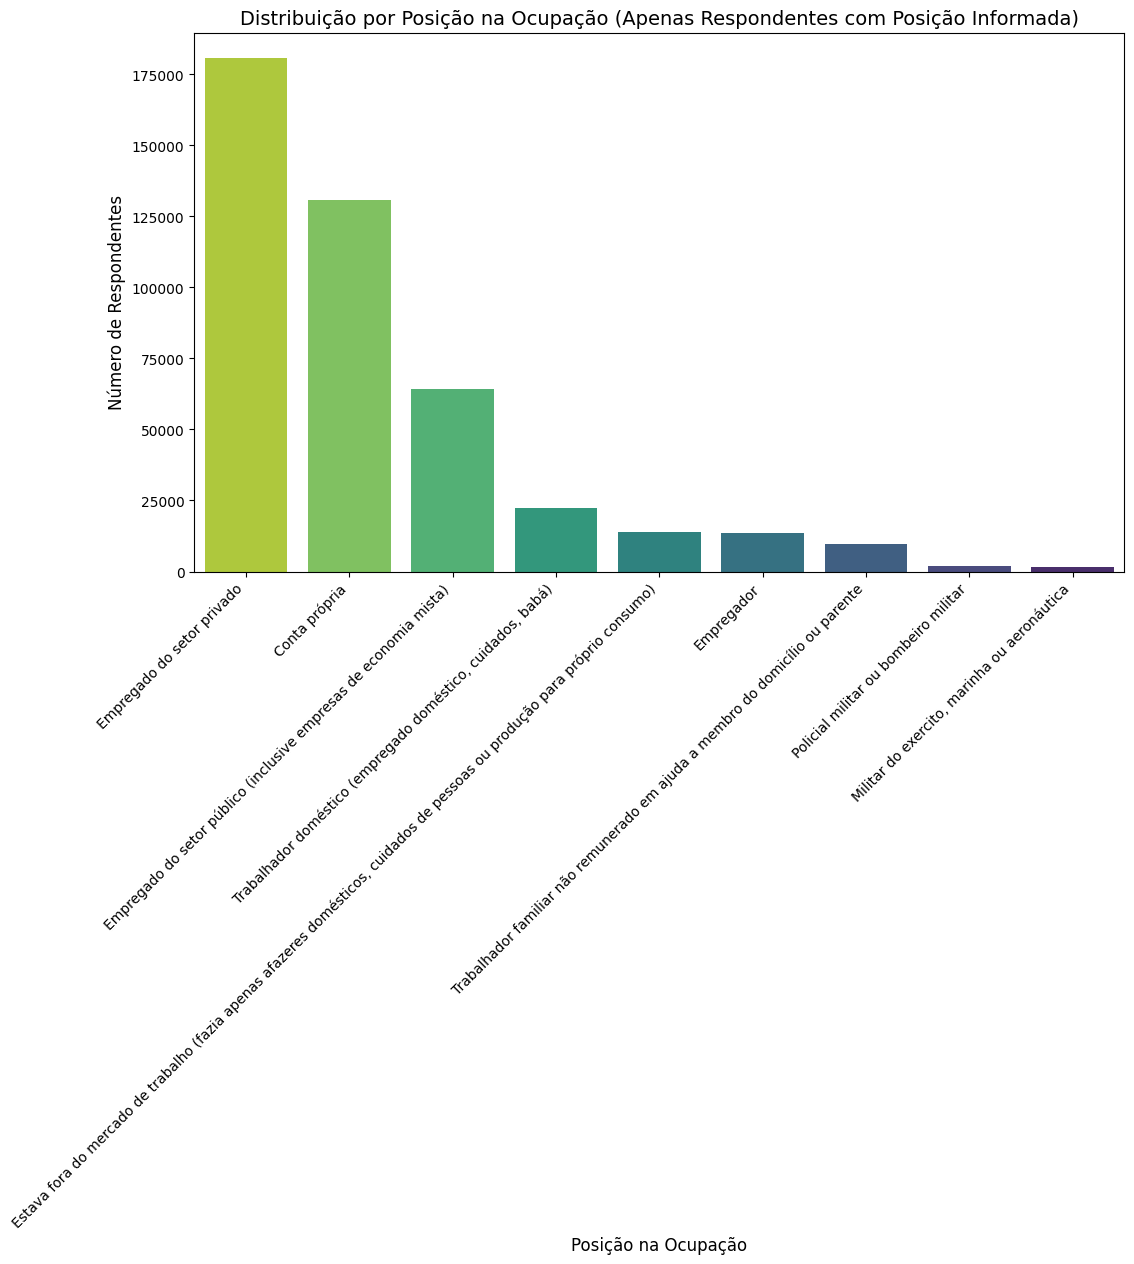


Estimativa Populacional por Posição na Ocupação (Apenas quem informou uma posição):


PosicaoOcupacao_desc
Empregado do setor privado                                                                                                     1.176669e+08
Conta própria                                                                                                                  7.065179e+07
Empregado do setor público (inclusive empresas de economia mista)                                                              3.396464e+07
Trabalhador doméstico (empregado doméstico, cuidados, babá)                                                                    1.238984e+07
Empregador                                                                                                                     8.020808e+06
Estava fora do mercado de trabalho (fazia apenas afazeres domésticos, cuidados de pessoas ou produção para próprio consumo)    5.443402e+06
Trabalhador familiar não remunerado em ajuda a membro do domicílio ou parente                                                  3.895481e+06

In [49]:
print("\n--- C3. Posição na Ocupação (Foco nos que Informaram) ---")

# Usando o DataFrame filtrado de A8.1 (criado na Seção A)
# Se df_pos_ocup_filtrado não foi definido globalmente ou se você limpou as saídas, recrie-o:
if 'df_pos_ocup_filtrado' not in locals() or df_pos_ocup_filtrado.empty:
    if 'PosicaoOcupacao_desc' in df_pnad.columns:
         df_pos_ocup_filtrado = df_pnad[df_pnad['PosicaoOcupacao_desc'] != 'Não Informado'].copy()
    else:
        print("Coluna 'PosicaoOcupacao_desc' não encontrada para criar df_pos_ocup_filtrado.")
        df_pos_ocup_filtrado = pd.DataFrame() # Cria um df vazio para evitar erros subsequentes

if not df_pos_ocup_filtrado.empty:
    contagem_pos_ocup_filt = df_pos_ocup_filtrado['PosicaoOcupacao_desc'].value_counts(dropna=False)
    percentual_pos_ocup_filt = df_pos_ocup_filtrado['PosicaoOcupacao_desc'].value_counts(normalize=True, dropna=False) * 100

    print("\nContagem e Percentual por Posição na Ocupação (Apenas quem informou uma posição):")
    df_pos_ocup_filt_resumo = pd.DataFrame({'Contagem': contagem_pos_ocup_filt, 'Percentual (%)': percentual_pos_ocup_filt})
    display(df_pos_ocup_filt_resumo)

    # Gráfico de Barras (similar ao A8.1)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=contagem_pos_ocup_filt.index, y=contagem_pos_ocup_filt.values, palette='viridis_r')
    plt.title('Distribuição por Posição na Ocupação (Apenas Respondentes com Posição Informada)', fontsize=14)
    plt.xlabel('Posição na Ocupação', fontsize=12)
    plt.ylabel('Número de Respondentes', fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

    # Exemplo de como calcular a estimativa populacional para cada posição (usando o df_pos_ocup_filtrado)
    pop_estimada_pos_ocup = df_pos_ocup_filtrado.groupby('PosicaoOcupacao_desc')['Peso_Amostral'].sum().sort_values(ascending=False)
    print("\nEstimativa Populacional por Posição na Ocupação (Apenas quem informou uma posição):")
    display(pop_estimada_pos_ocup)
else:
    print("DataFrame 'df_pos_ocup_filtrado' não pôde ser criado ou está vazio.")


--- C4. Distribuição por Faixa de Rendimento (Foco nos que Informaram) ---

Contagem e Percentual por Faixa de Rendimento (Apenas quem informou uma faixa):


,Contagem,Percentual (%)
FaixaRendimento_desc,,
0 - 100,3414,0.828729
101 - 300,14777,3.587034
301 - 600,30289,7.352484
601 - 800,16643,4.039995
801 - 1.600,182865,44.389449
1.601 - 3.000,100032,24.282205
3.001 - 10.000,56085,13.614318
10.001 - 50.000,7779,1.888308
50.001 - 100.000,63,0.015293


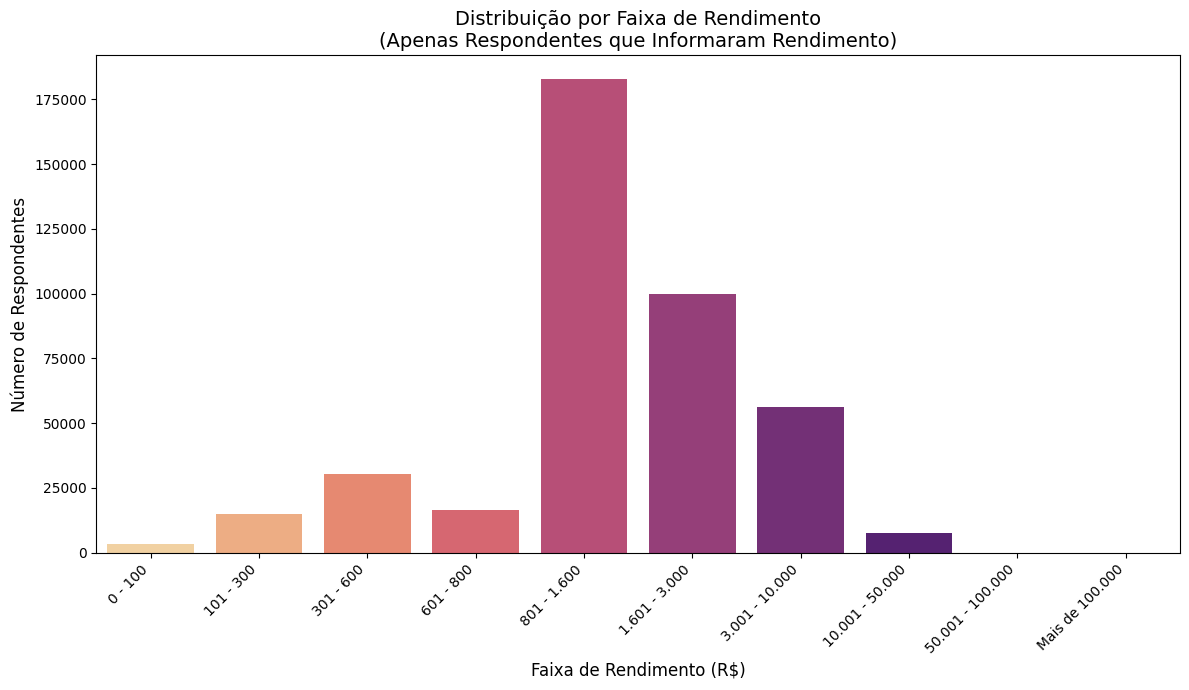

In [50]:
print("\n--- C4. Distribuição por Faixa de Rendimento (Foco nos que Informaram) ---")

# Filtrar para excluir "Não Informado"
df_faixa_rend_informado = df_pnad[df_pnad['FaixaRendimento_desc'] != 'Não Informado'].copy()

if not df_faixa_rend_informado.empty:
    # Reordenar para o gráfico
    ordem_faixa_rendimento = [
        '0 - 100', '101 - 300', '301 - 600', '601 - 800', '801 - 1.600',
        '1.601 - 3.000', '3.001 - 10.000', '10.001 - 50.000',
        '50.001 - 100.000', 'Mais de 100.000'
    ]
    # Garantir que apenas categorias presentes sejam usadas para reindexar
    ordem_presente_faixa_rend_inf = [cat for cat in ordem_faixa_rendimento if cat in df_faixa_rend_informado['FaixaRendimento_desc'].unique()]

    contagem_faixa_rend_inf = df_faixa_rend_informado['FaixaRendimento_desc'].value_counts(dropna=False).reindex(ordem_presente_faixa_rend_inf)
    percentual_faixa_rend_inf = df_faixa_rend_informado['FaixaRendimento_desc'].value_counts(normalize=True, dropna=False).reindex(ordem_presente_faixa_rend_inf) * 100

    print("\nContagem e Percentual por Faixa de Rendimento (Apenas quem informou uma faixa):")
    df_faixa_rend_inf_resumo = pd.DataFrame({'Contagem': contagem_faixa_rend_inf, 'Percentual (%)': percentual_faixa_rend_inf})
    display(df_faixa_rend_inf_resumo.dropna()) # dropna para o caso de alguma categoria da ordem não estar presente

    # Gráfico de Barras
    plt.figure(figsize=(12, 7))
    sns.barplot(x=contagem_faixa_rend_inf.index, y=contagem_faixa_rend_inf.values, palette='magma_r')
    plt.title('Distribuição por Faixa de Rendimento\n(Apenas Respondentes que Informaram Rendimento)', fontsize=14)
    plt.xlabel('Faixa de Rendimento (R$)', fontsize=12)
    plt.ylabel('Número de Respondentes', fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=10) # Ajustei fontsize para tentar caber melhor
    plt.tight_layout()
    plt.show()
else:
    print("Não há dados para exibir após filtrar 'Não Informado' da Faixa de Rendimento.")


--- C5. Recebimento de Auxílio Emergencial ---

Contagem e Percentual - Recebeu Auxílio Emergencial:


,Contagem,Percentual (%)
AuxilioEmergencial_desc,,
Não,560538,50.013651
Sim,560232,49.986349


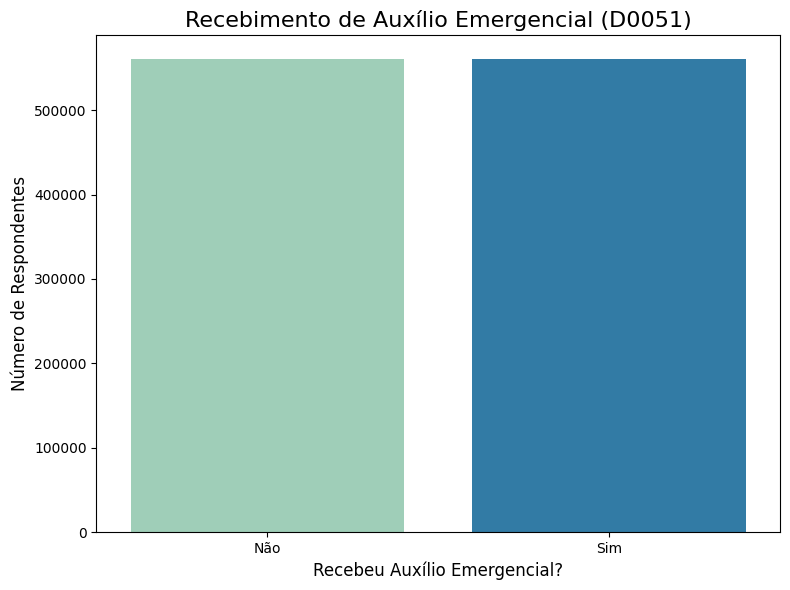

In [51]:
print("\n--- C5. Recebimento de Auxílio Emergencial ---")

contagem_auxilio = df_pnad['AuxilioEmergencial_desc'].value_counts(dropna=False)
percentual_auxilio = df_pnad['AuxilioEmergencial_desc'].value_counts(normalize=True, dropna=False) * 100

print("\nContagem e Percentual - Recebeu Auxílio Emergencial:")
df_auxilio_resumo = pd.DataFrame({'Contagem': contagem_auxilio, 'Percentual (%)': percentual_auxilio})
display(df_auxilio_resumo)

# Gráfico de Barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_auxilio.index, y=contagem_auxilio.values, palette="YlGnBu")
plt.title('Recebimento de Auxílio Emergencial (D0051)', fontsize=16)
plt.ylabel('Número de Respondentes', fontsize=12)
plt.xlabel('Recebeu Auxílio Emergencial?', fontsize=12)
# plt.xticks(rotation=0) # Rotação 0 é o padrão, pode omitir
plt.tight_layout()
plt.show()

## D. Análise Temporal (Comparação entre os Meses)
Aqui, observamos como algumas das principais métricas clínicas e econômicas evoluíram ao longo dos três meses da pesquisa (Maio, Julho e Setembro de 2020) para identificar tendências.


--- D1. Evolução da Prevalência de Sintomas Chave ao Longo dos Meses ---

Evolução Percentual de Reporte 'Sim' para Sintomas Chave por Mês:


,Febre,Tosse,Dificuldade para Respirar,Perda de Olfato/Paladar
DataReferencia_Mes,,,,
2020-05-01 00:00:00,2.42%,3.46%,1.45%,1.76%
2020-07-01 00:00:00,1.52%,2.21%,0.79%,0.88%
2020-09-01 00:00:00,0.80%,1.43%,0.47%,0.42%


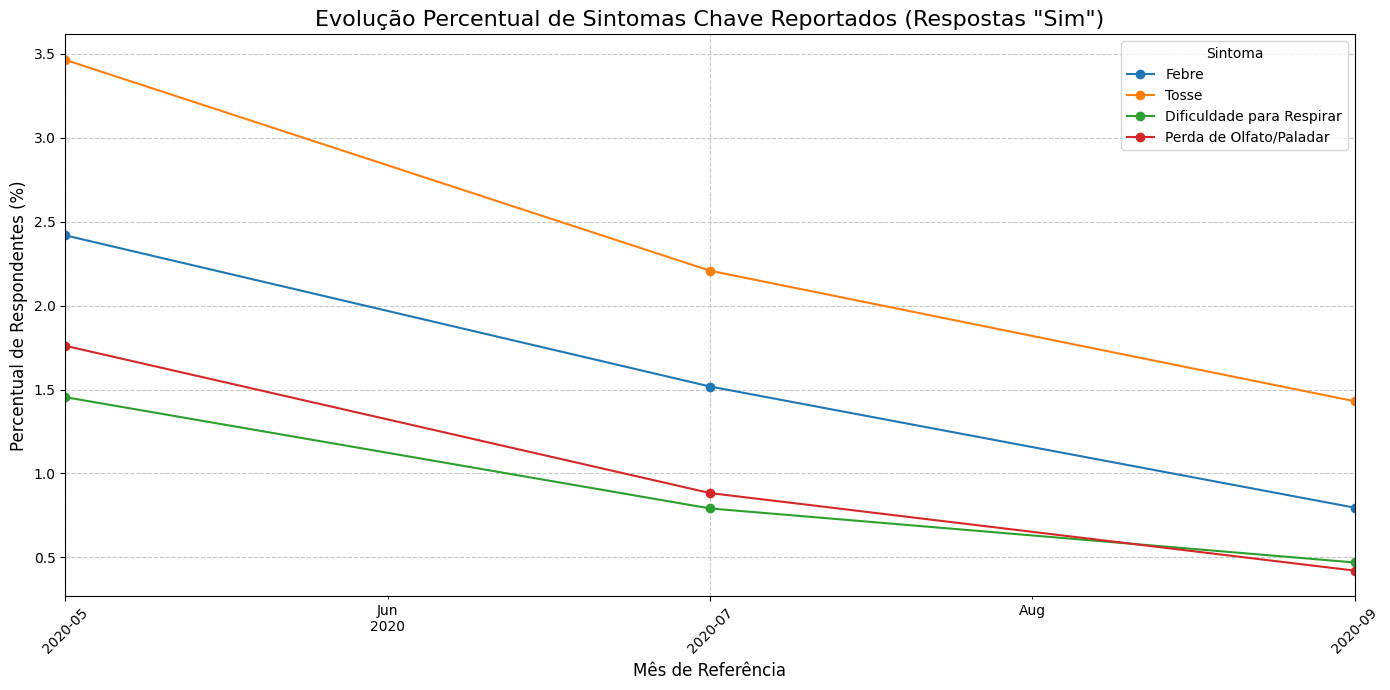

In [52]:
print("\n--- D1. Evolução da Prevalência de Sintomas Chave ao Longo dos Meses ---")

sintomas_para_temporal = {
    'Febre': 'Febre_desc',
    'Tosse': 'Tosse_desc',
    'Dificuldade para Respirar': 'DificuldadeRespirar_desc',
    'Perda de Olfato/Paladar': 'PerdaOlfatoPaladar_desc'
}

df_sintomas_temporal_list = []

for nome_sintoma, coluna_sintoma in sintomas_para_temporal.items():
    if coluna_sintoma in df_pnad.columns:
        percentual_sim_por_mes = df_pnad.groupby('DataReferencia_Mes')[coluna_sintoma].value_counts(normalize=True).mul(100).unstack(fill_value=0)
        
        if 'Sim' in percentual_sim_por_mes.columns:
            df_temp = percentual_sim_por_mes[['Sim']].copy() # Pega apenas a coluna 'Sim'
            df_temp.rename(columns={'Sim': nome_sintoma}, inplace=True)
            df_sintomas_temporal_list.append(df_temp)
        else:
            print(f"Não houve casos 'Sim' para {nome_sintoma} ou a coluna 'Sim' não foi gerada.")

if df_sintomas_temporal_list:
    df_sintomas_evolucao = pd.concat(df_sintomas_temporal_list, axis=1)
    df_sintomas_evolucao = df_sintomas_evolucao.fillna(0) # Preenche com 0 se algum mês não teve 'Sim'

    print("\nEvolução Percentual de Reporte 'Sim' para Sintomas Chave por Mês:")
    display(df_sintomas_evolucao.style.format("{:.2f}%"))

    # Gráfico de Linhas para a evolução dos sintomas
    df_sintomas_evolucao.plot(kind='line', figsize=(14, 7), marker='o')
    plt.title('Evolução Percentual de Sintomas Chave Reportados (Respostas "Sim")', fontsize=16)
    plt.ylabel('Percentual de Respondentes (%)', fontsize=12)
    plt.xlabel('Mês de Referência', fontsize=12)
    plt.xticks(df_sintomas_evolucao.index, [d.strftime('%Y-%m') for d in df_sintomas_evolucao.index], rotation=45)
    plt.legend(title='Sintoma')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Não foi possível gerar dados para a evolução dos sintomas.")


--- D2. Evolução da Procura por Atendimento (entre sintomáticos) ao Longo dos Meses ---

Evolução Percentual da Procura por Atendimento ('Sim') entre Sintomáticos:


ProcurouAtendimento_desc,Sim
DataReferencia_Mes,
2020-05-01 00:00:00,23.22%
2020-07-01 00:00:00,34.14%
2020-09-01 00:00:00,36.97%


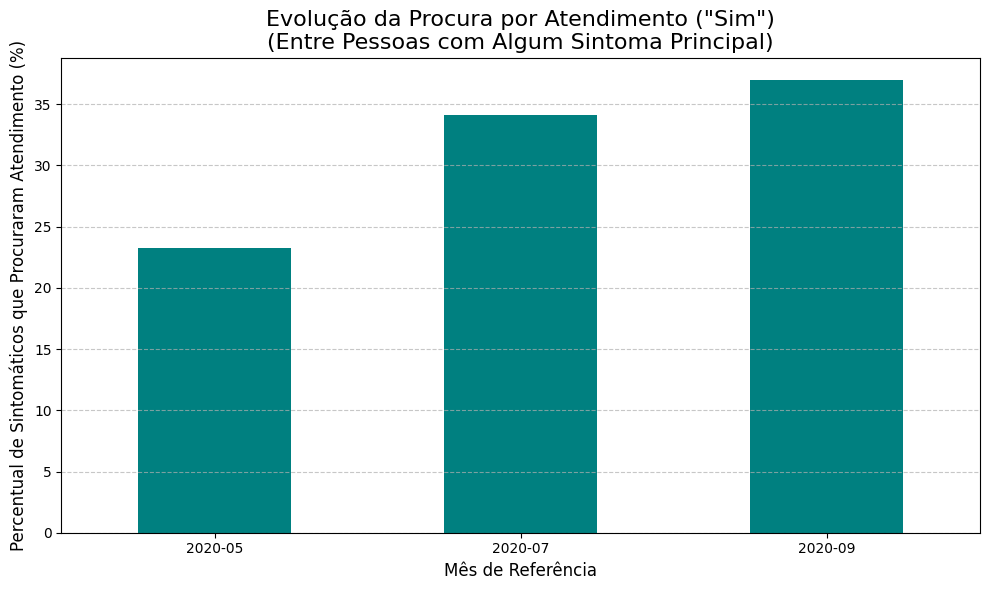

In [53]:
print("\n--- D2. Evolução da Procura por Atendimento (entre sintomáticos) ao Longo dos Meses ---")

if 'df_com_sintomas' not in locals() or df_com_sintomas.empty:
    if 'Teve_Algum_Sintoma_Principal' in df_pnad.columns:
        df_com_sintomas = df_pnad[df_pnad['Teve_Algum_Sintoma_Principal'] == True].copy()
    else: # Se a coluna auxiliar não existe, recrie-a
        df_pnad['Teve_Algum_Sintoma_Principal'] = (
            (df_pnad['Febre_desc'] == 'Sim') |
            (df_pnad['Tosse_desc'] == 'Sim') |
            (df_pnad['DificuldadeRespirar_desc'] == 'Sim') |
            (df_pnad['PerdaOlfatoPaladar_desc'] == 'Sim')
        )
        df_com_sintomas = df_pnad[df_pnad['Teve_Algum_Sintoma_Principal'] == True].copy()

if not df_com_sintomas.empty:
    # Percentual de 'Sim' para ProcurouAtendimento_desc, entre os sintomáticos, por mês
    evolucao_procura_atend = df_com_sintomas.groupby('DataReferencia_Mes')['ProcurouAtendimento_desc'] \
                                          .value_counts(normalize=True).mul(100) \
                                          .unstack(fill_value=0)

    if 'Sim' in evolucao_procura_atend.columns:
        print("\nEvolução Percentual da Procura por Atendimento ('Sim') entre Sintomáticos:")
        display(evolucao_procura_atend[['Sim']].style.format("{:.2f}%"))

        evolucao_procura_atend[['Sim']].plot(kind='bar', figsize=(10, 6), legend=None, color='teal')
        plt.title('Evolução da Procura por Atendimento ("Sim")\n(Entre Pessoas com Algum Sintoma Principal)', fontsize=16)
        plt.ylabel('Percentual de Sintomáticos que Procuraram Atendimento (%)', fontsize=12)
        plt.xlabel('Mês de Referência', fontsize=12)
        plt.xticks(ticks=range(len(evolucao_procura_atend.index)), labels=[d.strftime('%Y-%m') for d in evolucao_procura_atend.index], rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Não houve casos 'Sim' para 'ProcurouAtendimento_desc' entre os sintomáticos ou a coluna não foi gerada.")
else:
    print("DataFrame 'df_com_sintomas' está vazio. Execute a célula B2 primeiro.")


--- D3. Evolução da Situação de Trabalho e Recebimento de Auxílio ---

Evolução Percentual de 'Trabalhou (Sim)' e 'Recebeu Auxílio (Sim)':


,% Trabalhou (Sim),% Recebeu Auxílio (Sim)
DataReferencia_Mes,,
2020-05-01 00:00:00,31.55%,46.05%
2020-07-01 00:00:00,33.80%,51.93%
2020-09-01 00:00:00,36.27%,51.61%


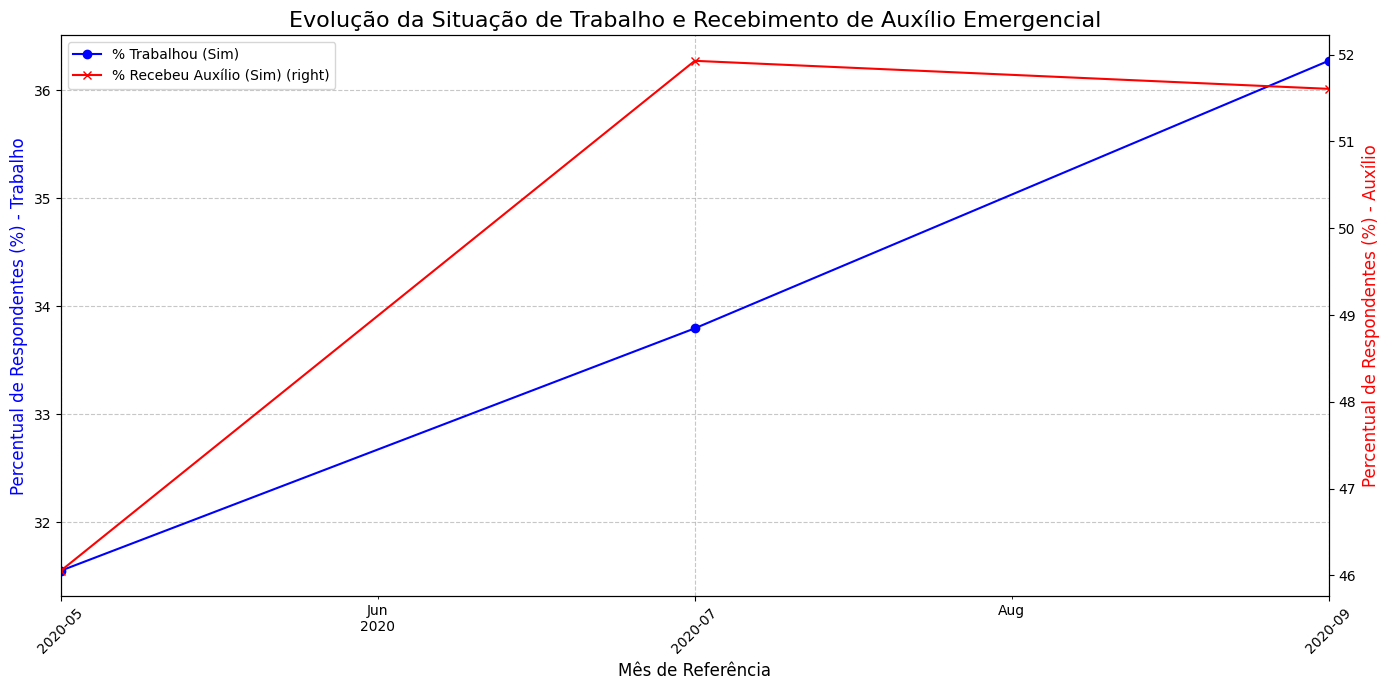

In [54]:
# D3. Evolução da Situação de Trabalho e Recebimento de Auxílio
print("\n--- D3. Evolução da Situação de Trabalho e Recebimento de Auxílio ---")

# Situação de Trabalho (Trabalhou_desc = 'Sim')
evolucao_trabalhou = df_pnad.groupby('DataReferencia_Mes')['Trabalhou_desc'] \
                            .value_counts(normalize=True).mul(100) \
                            .unstack(fill_value=0)

# Auxílio Emergencial (AuxilioEmergencial_desc = 'Sim')
evolucao_auxilio = df_pnad.groupby('DataReferencia_Mes')['AuxilioEmergencial_desc'] \
                          .value_counts(normalize=True).mul(100) \
                          .unstack(fill_value=0)

# Combinar os resultados para plotagem
df_evolucao_eco = pd.DataFrame(index=evolucao_trabalhou.index) # Garante que o índice seja datetime

# Adicionar colunas apenas se 'Sim' existir para evitar erros
if 'Sim' in evolucao_trabalhou.columns:
    df_evolucao_eco['% Trabalhou (Sim)'] = evolucao_trabalhou['Sim'] # Nome mais claro
else:
    df_evolucao_eco['% Trabalhou (Sim)'] = 0 # Preenche com 0 se não houver 'Sim'

if 'Sim' in evolucao_auxilio.columns:
    df_evolucao_eco['% Recebeu Auxílio (Sim)'] = evolucao_auxilio['Sim'] # Nome mais claro
else:
    df_evolucao_eco['% Recebeu Auxílio (Sim)'] = 0 # Preenche com 0 se não houver 'Sim'


if not df_evolucao_eco.empty:
    print("\nEvolução Percentual de 'Trabalhou (Sim)' e 'Recebeu Auxílio (Sim)':")
    display(df_evolucao_eco.style.format("{:.2f}%"))

    # --- MUDANÇA IMPORTANTE NA PLOTAGEM ---
    ax1 = df_evolucao_eco['% Trabalhou (Sim)'].plot(kind='line', figsize=(14, 7), marker='o', color='blue', label='% Trabalhou (Sim)')
    ax2 = df_evolucao_eco['% Recebeu Auxílio (Sim)'].plot(kind='line', secondary_y=True, marker='x', color='red', label='% Recebeu Auxílio (Sim)', ax=ax1)
    # ------------------------------------

    ax1.set_title('Evolução da Situação de Trabalho e Recebimento de Auxílio Emergencial', fontsize=16)
    ax1.set_xlabel('Mês de Referência', fontsize=12)
    ax1.set_ylabel('Percentual de Respondentes (%) - Trabalho', fontsize=12, color='blue')
    ax2.set_ylabel('Percentual de Respondentes (%) - Auxílio', fontsize=12, color='red') # Eixo Y secundário

    # Configurar os ticks do eixo X para mostrar YYYY-MM
    ax1.set_xticks(df_evolucao_eco.index)
    ax1.set_xticklabels([d.strftime('%Y-%m') for d in df_evolucao_eco.index], rotation=45)
    
    # Adicionar legendas
    # Como estamos plotando separadamente para ter controle dos eixos, precisamos criar a legenda manualmente ou ajustar
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    ax1.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Não foi possível gerar dados para a evolução econômica.")


--- E1. Perfil Demográfico de Quem Procurou Atendimento Médico Tendo Sintomas ---
Analisando o perfil de 11944 pessoas que tiveram sintomas e procuraram atendimento.


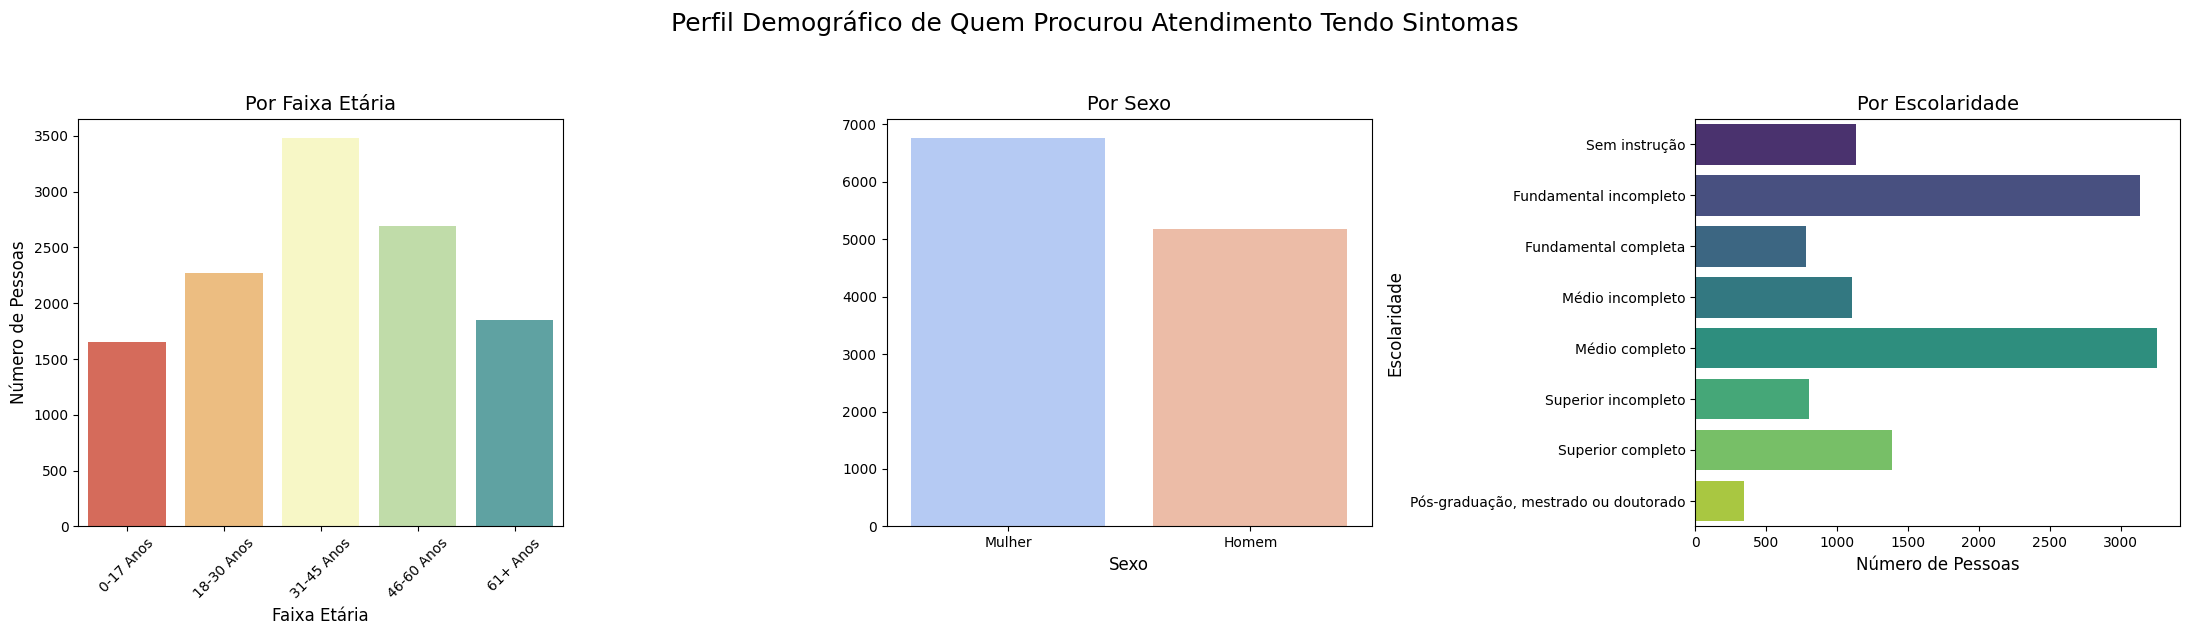

In [55]:
# E1. Perfil Demográfico de Quem Procurou Atendimento Médico Tendo Sintomas
print("\n--- E1. Perfil Demográfico de Quem Procurou Atendimento Médico Tendo Sintomas ---")

# Reutilizar df_sintomas_e_procurou_atend criado em B3
# Se não existir, recrie-o:
if 'df_sintomas_e_procurou_atend' not in locals() or df_sintomas_e_procurou_atend.empty:
    if 'df_com_sintomas' in locals() and not df_com_sintomas.empty:
        df_sintomas_e_procurou_atend = df_com_sintomas[df_com_sintomas['ProcurouAtendimento_desc'] == 'Sim'].copy()
    else:
        # Recriar df_com_sintomas se necessário
        df_pnad['Teve_Algum_Sintoma_Principal'] = (
            (df_pnad['Febre_desc'] == 'Sim') |
            (df_pnad['Tosse_desc'] == 'Sim') |
            (df_pnad['DificuldadeRespirar_desc'] == 'Sim') |
            (df_pnad['PerdaOlfatoPaladar_desc'] == 'Sim')
        )
        df_com_sintomas = df_pnad[df_pnad['Teve_Algum_Sintoma_Principal'] == True].copy()
        df_sintomas_e_procurou_atend = df_com_sintomas[df_com_sintomas['ProcurouAtendimento_desc'] == 'Sim'].copy()

if not df_sintomas_e_procurou_atend.empty:
    print(f"Analisando o perfil de {len(df_sintomas_e_procurou_atend)} pessoas que tiveram sintomas e procuraram atendimento.")

    # Perfil por Faixa Etária (vamos criar faixas etárias para agrupar)
    bins_idade = [0, 17, 30, 45, 60, 120] # Idades de 0-17, 18-30, 31-45, 46-60, 61+
    labels_idade = ['0-17 Anos', '18-30 Anos', '31-45 Anos', '46-60 Anos', '61+ Anos']
    df_sintomas_e_procurou_atend['Faixa_Etaria'] = pd.cut(df_sintomas_e_procurou_atend['Idade'], bins=bins_idade, labels=labels_idade, right=True, include_lowest=True)

    fig, axes = plt.subplots(1, 3, figsize=(22, 6)) # 1 linha, 3 colunas de gráficos

    # Gráfico por Faixa Etária
    sns.countplot(data=df_sintomas_e_procurou_atend, x='Faixa_Etaria', ax=axes[0], palette='Spectral', order=labels_idade)
    axes[0].set_title('Por Faixa Etária', fontsize=14)
    axes[0].set_xlabel('Faixa Etária', fontsize=12)
    axes[0].set_ylabel('Número de Pessoas', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)

    # Gráfico por Sexo
    sns.countplot(data=df_sintomas_e_procurou_atend, x='sexo_desc', ax=axes[1], palette='coolwarm')
    axes[1].set_title('Por Sexo', fontsize=14)
    axes[1].set_xlabel('Sexo', fontsize=12)
    axes[1].set_ylabel('') # Remover rótulo do eixo Y para não repetir

    # Gráfico por Escolaridade
    # Ordenar categorias de escolaridade para o gráfico
    ordem_escolaridade = [
        'Sem instrução', 'Fundamental incompleto', 'Fundamental completa', 
        'Médio incompleto', 'Médio completo', 'Superior incompleto', 
        'Superior completo', 'Pós-graduação, mestrado ou doutorado', 'Não Informado'
    ]
    ordem_presente_escolaridade_e1 = [cat for cat in ordem_escolaridade if cat in df_sintomas_e_procurou_atend['escolaridade_desc'].unique()]
    
    sns.countplot(data=df_sintomas_e_procurou_atend, y='escolaridade_desc', ax=axes[2], palette='viridis', order=ordem_presente_escolaridade_e1)
    axes[2].set_title('Por Escolaridade', fontsize=14)
    axes[2].set_xlabel('Número de Pessoas', fontsize=12)
    axes[2].set_ylabel('Escolaridade', fontsize=12)

    plt.suptitle('Perfil Demográfico de Quem Procurou Atendimento Tendo Sintomas', fontsize=18, y=1.05)
    plt.tight_layout()
    plt.show()

    # Limpar a coluna Faixa_Etaria se não for mais necessária globalmente no df_sintomas_e_procurou_atend
    # df_sintomas_e_procurou_atend.drop('Faixa_Etaria', axis=1, inplace=True) 
else:
    print("Não há dados suficientes para analisar o perfil demográfico de quem procurou atendimento com sintomas.")


--- E2. Quais Sintomas Mais Levaram à Procura por Atendimento? ---
Analisando sintomas de 15900 pessoas que procuraram atendimento.

Contagem de 'Sim' para cada Sintoma entre os que Procuraram Atendimento:


,Contagem_Sim
Tosse,7537
Febre,7380
PerdaOlfatoPaladar,4480
DificuldadeRespirar,4092


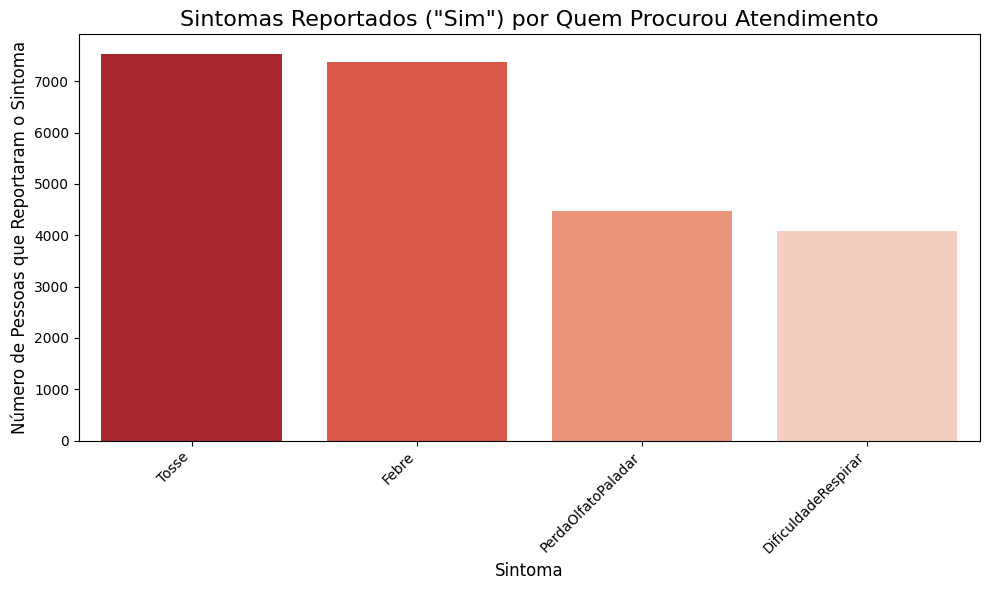

In [56]:
# E2. Quais Sintomas Mais Levaram à Procura por Atendimento?
print("\n--- E2. Quais Sintomas Mais Levaram à Procura por Atendimento? ---")

# Filtrar para pessoas que procuraram atendimento
df_procurou_atend_sim = df_pnad[df_pnad['ProcurouAtendimento_desc'] == 'Sim'].copy()

if not df_procurou_atend_sim.empty:
    print(f"Analisando sintomas de {len(df_procurou_atend_sim)} pessoas que procuraram atendimento.")
    
    sintomas_cols_desc = ['Febre_desc', 'Tosse_desc', 'DificuldadeRespirar_desc', 'PerdaOlfatoPaladar_desc']
    sintomas_contagem_em_atendimento = {}

    for col in sintomas_cols_desc:
        if col in df_procurou_atend_sim.columns:
            # Contar apenas os 'Sim' para cada sintoma neste subgrupo
            contagem_sim = df_procurou_atend_sim[df_procurou_atend_sim[col] == 'Sim'].shape[0]
            sintomas_contagem_em_atendimento[col.replace('_desc', '')] = contagem_sim
    
    if sintomas_contagem_em_atendimento:
        df_sintomas_causa_atend = pd.DataFrame.from_dict(sintomas_contagem_em_atendimento, orient='index', columns=['Contagem_Sim'])
        df_sintomas_causa_atend = df_sintomas_causa_atend.sort_values(by='Contagem_Sim', ascending=False)

        print("\nContagem de 'Sim' para cada Sintoma entre os que Procuraram Atendimento:")
        display(df_sintomas_causa_atend)

        # Gráfico de Barras
        plt.figure(figsize=(10, 6))
        sns.barplot(x=df_sintomas_causa_atend.index, y=df_sintomas_causa_atend['Contagem_Sim'], palette='Reds_r')
        plt.title('Sintomas Reportados ("Sim") por Quem Procurou Atendimento', fontsize=16)
        plt.ylabel('Número de Pessoas que Reportaram o Sintoma', fontsize=12)
        plt.xlabel('Sintoma', fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print("Não foi possível calcular a contagem de sintomas para quem procurou atendimento.")
else:
    print("Não há dados de pessoas que procuraram atendimento para analisar.")


--- E3. Relação entre Faixa de Rendimento e Internação (entre sintomáticos que procuraram atendimento) ---

Percentual de Internação ('Sim') por Faixa de Rendimento:


InternadoHospital_desc,"Não, não ficou internado","Sim, ficou internado"
FaixaRendimento_desc,,
0 - 100,88.24%,11.76%
101 - 300,92.31%,7.69%
301 - 600,93.46%,6.54%
601 - 800,93.15%,6.85%
801 - 1.600,93.66%,6.34%
1.601 - 3.000,90.21%,9.79%
3.001 - 10.000,92.08%,7.92%
10.001 - 50.000,85.19%,14.81%


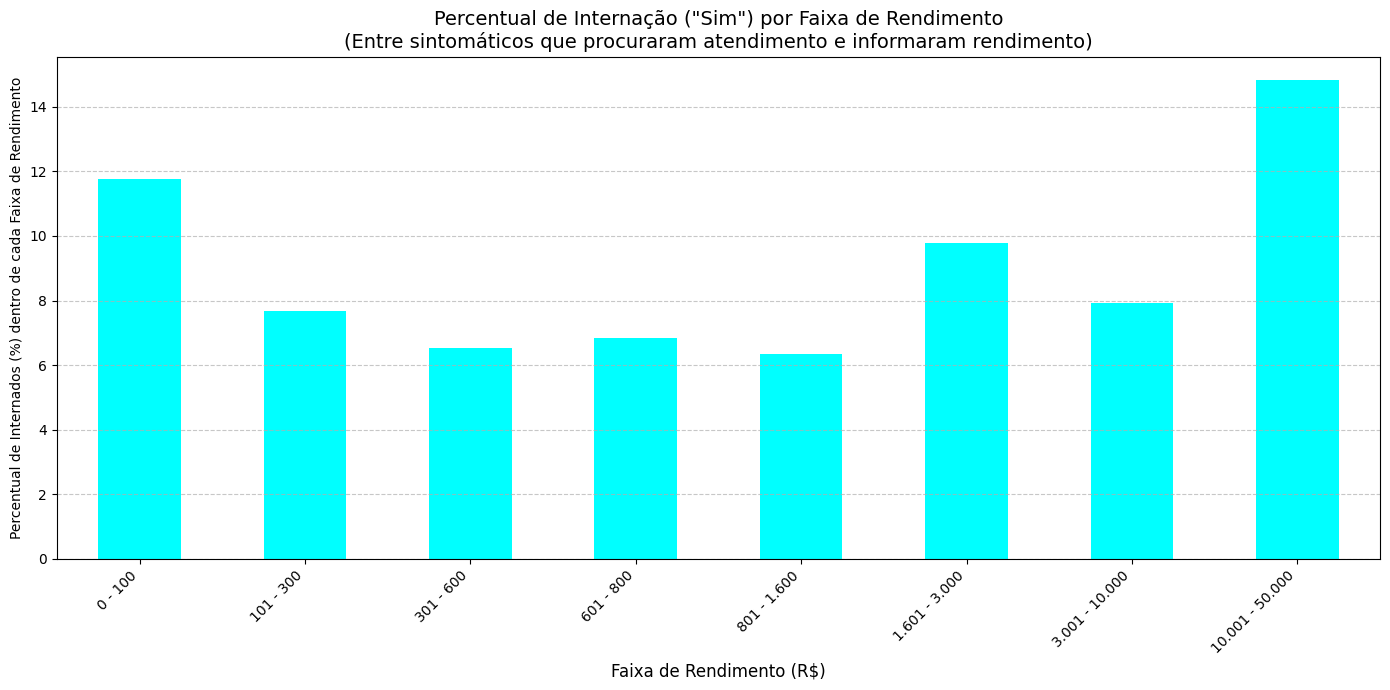

In [57]:
# E3. Relação entre Faixa de Rendimento e Internação
# (Filtro: tiveram sintomas, procuraram atendimento)
print("\n--- E3. Relação entre Faixa de Rendimento e Internação (entre sintomáticos que procuraram atendimento) ---")

# Reutilizar df_sintomas_e_procurou_atend de E1 (ou recriá-lo se necessário)
if 'df_sintomas_e_procurou_atend' not in locals() or df_sintomas_e_procurou_atend.empty:
    # ... (código para recriar df_sintomas_e_procurou_atend como em E1) ...
    # Por simplicidade, vamos assumir que ele existe. Se der erro, cole o código de recriação de E1 aqui.
    print("DataFrame 'df_sintomas_e_procurou_atend' não encontrado. Execute E1 ou adicione código de recriação.")
else:
    if not df_sintomas_e_procurou_atend.empty:
        # Vamos focar em quem foi internado ('Sim') ou não ('Não')
        df_analise_rend_internacao = df_sintomas_e_procurou_atend[
            df_sintomas_e_procurou_atend['InternadoHospital_desc'].isin(['Sim, ficou internado', 'Não, não ficou internado'])
        ].copy()
        
        # Excluir 'Não Informado' da Faixa de Rendimento para esta análise específica
        df_analise_rend_internacao = df_analise_rend_internacao[
            df_analise_rend_internacao['FaixaRendimento_desc'] != 'Não Informado'
        ]

        if not df_analise_rend_internacao.empty:
            tabela_cruzada_rend_intern = pd.crosstab(
                df_analise_rend_internacao['FaixaRendimento_desc'],
                df_analise_rend_internacao['InternadoHospital_desc'],
                normalize='index' # Percentual por faixa de rendimento
            ).mul(100)
            
            # Reordenar o índice (Faixa de Rendimento) para melhor visualização
            ordem_faixa_rendimento_e3 = [
                '0 - 100', '101 - 300', '301 - 600', '601 - 800', '801 - 1.600',
                '1.601 - 3.000', '3.001 - 10.000', '10.001 - 50.000',
                '50.001 - 100.000', 'Mais de 100.000'
            ]
            ordem_presente_e3 = [cat for cat in ordem_faixa_rendimento_e3 if cat in tabela_cruzada_rend_intern.index]
            tabela_cruzada_rend_intern = tabela_cruzada_rend_intern.reindex(ordem_presente_e3)

            print("\nPercentual de Internação ('Sim') por Faixa de Rendimento:")
            display(tabela_cruzada_rend_intern.style.format("{:.2f}%"))

            if 'Sim, ficou internado' in tabela_cruzada_rend_intern.columns:
                tabela_cruzada_rend_intern['Sim, ficou internado'].plot(kind='bar', figsize=(14, 7), colormap='cool')
                plt.title('Percentual de Internação ("Sim") por Faixa de Rendimento\n(Entre sintomáticos que procuraram atendimento e informaram rendimento)', fontsize=14)
                plt.ylabel('Percentual de Internados (%) dentro de cada Faixa de Rendimento', fontsize=10)
                plt.xlabel('Faixa de Rendimento (R$)', fontsize=12)
                plt.xticks(rotation=45, ha='right')
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()
            else:
                print("Não houve casos de 'Sim, ficou internado' para plotar por faixa de rendimento.")
        else:
            print("Não há dados suficientes após filtrar para análise de rendimento e internação.")
    else:
        print("DataFrame 'df_sintomas_e_procurou_atend' está vazio.")

## Conclusões Preliminares da Análise Exploratória
*(Aqui você escreveria um resumo dos seus principais achados de todas as seções. O que mais te chamou a atenção? Quais padrões emergiram?)*

Exemplos:
- A amostra apresentou maior concentração de respondentes nos estados X, Y e Z.
- O sintoma mais prevalente foi A, enquanto o sintoma B, embora menos comum, parece estar mais associado à procura por atendimento.
- Observou-se uma tendência de [aumento/diminuição] no [indicador X] ao longo dos meses.
- O recebimento de auxílio emergencial foi mais concentrado entre indivíduos com [característica Y].

## Próximos Passos
- Desenvolvimento de um dashboard interativo no Looker Studio para apresentar os principais KPIs e permitir a exploração dos dados.
- Formulação de recomendações específicas para o planejamento hospitalar com base nos insights gerados.
- Preparação do relatório final e do repositório do projeto.